# Exploratory Data Analysis (EDA) - Bäckerei Umsatzvorhersage

## 1. **Datenqualität & Grundstruktur**
- Fehlende Werte analysieren
- Datentypen überprüfen
- Duplikate identifizieren
- Zeitreihen-Kontinuität prüfen

In [103]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Plotting-Konfiguration
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Bibliotheken erfolgreich importiert")

✅ Bibliotheken erfolgreich importiert


In [104]:
# Datensatz laden
df = pd.read_csv('/workspaces/bakery_sales_prediction/5_Datasets/bakery_training_dataset.csv')

# Erste Übersicht
print("=== DATENSATZ GRUNDINFORMATIONEN ===")
print(f"📊 Datensatz Shape: {df.shape}")
print(f"📅 Zeitraum: {df['Datum'].min()} bis {df['Datum'].max()}")
print(f"🏪 Anzahl Warengruppen: {df['Warengruppe_Name'].nunique()}")

# Erste 5 und letzte 5 Zeilen anzeigen
print("\n=== ERSTE 5 ZEILEN ===")
display(df.head())

print("\n=== LETZTE 5 ZEILEN ===")
display(df.tail())

=== DATENSATZ GRUNDINFORMATIONEN ===
📊 Datensatz Shape: (9334, 35)
📅 Zeitraum: 2013-07-01 bis 2018-07-31
🏪 Anzahl Warengruppen: 6

=== ERSTE 5 ZEILEN ===


,Datum,Jahr,Monat,Tag,Wochentag,Wochentag_Nr,Warengruppe,Warengruppe_Name,Temperatur,Windgeschwindigkeit,...,Jahreszeit_Herbst,Wochentag_Nr.1,Wochentag_Monday,Wochentag_Tuesday,Wochentag_Wednesday,Wochentag_Thursday,Wochentag_Friday,Wochentag_Saturday,Wochentag_Sunday,Wettercode
0,2013-07-01,2013,7,1,Monday,0,1,Brot,17.8375,15.0,...,0,0,1,0,0,0,0,0,0,51
1,2013-07-02,2013,7,2,Tuesday,1,1,Brot,17.3125,10.0,...,0,1,0,1,0,0,0,0,0,51
2,2013-07-03,2013,7,3,Wednesday,2,1,Brot,21.0750,6.0,...,0,2,0,0,1,0,0,0,0,61
3,2013-07-04,2013,7,4,Thursday,3,1,Brot,18.8500,7.0,...,0,3,0,0,0,1,0,0,0,51
4,2013-07-05,2013,7,5,Friday,4,1,Brot,19.9750,12.0,...,0,4,0,0,0,0,1,0,0,51



=== LETZTE 5 ZEILEN ===


,Datum,Jahr,Monat,Tag,Wochentag,Wochentag_Nr,Warengruppe,Warengruppe_Name,Temperatur,Windgeschwindigkeit,...,Jahreszeit_Herbst,Wochentag_Nr.1,Wochentag_Monday,Wochentag_Tuesday,Wochentag_Wednesday,Wochentag_Thursday,Wochentag_Friday,Wochentag_Saturday,Wochentag_Sunday,Wettercode
9329,2017-12-21,2017,12,21,Thursday,3,6,Saisonbrot,6.2375,10.0,...,0,3,0,0,0,1,0,0,0,3
9330,2017-12-22,2017,12,22,Friday,4,6,Saisonbrot,5.7625,9.0,...,0,4,0,0,0,0,1,0,0,3
9331,2017-12-23,2017,12,23,Saturday,5,6,Saisonbrot,7.8000,19.0,...,0,5,0,0,0,0,0,1,0,3
9332,2017-12-24,2017,12,24,Sunday,6,6,Saisonbrot,8.1125,16.0,...,0,6,0,0,0,0,0,0,1,3
9333,2017-12-27,2017,12,27,Wednesday,2,6,Saisonbrot,4.6125,7.0,...,0,2,0,0,1,0,0,0,0,51


In [105]:
# 1.1 DATENTYPEN ÜBERPRÜFUNG
print("=== DATENTYPEN ANALYSE ===")
print("\n📋 Aktuelle Datentypen:")
print(df.dtypes)

print(f"\n📊 Speicherverbrauch: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Datum konvertieren
df['Datum'] = pd.to_datetime(df['Datum'])
print(f"\n✅ Datum erfolgreich zu datetime konvertiert")

# Kategorische Variablen identifizieren
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n📊 Kategorische Spalten ({len(categorical_cols)}): {categorical_cols}")
print(f"📊 Numerische Spalten ({len(numerical_cols)}): {numerical_cols}")

# Unique Values für kategorische Spalten
print(f"\n=== UNIQUE VALUES IN KATEGORISCHEN SPALTEN ===")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 10:
        print(f"  Values: {sorted(df[col].unique())}")
    print()

=== DATENTYPEN ANALYSE ===

📋 Aktuelle Datentypen:
Datum                      object
Jahr                        int64
Monat                       int64
Tag                         int64
Wochentag                  object
Wochentag_Nr                int64
Warengruppe                 int64
Warengruppe_Name           object
Temperatur                float64
Windgeschwindigkeit       float64
Bewoelkung                float64
Wettercode_fehlt            int64
ist_feiertag                int64
Jahreszeit                 object
ist_kiwo                    int64
Umsatz                    float64
Warengruppe_Brot            int64
Warengruppe_Brötchen        int64
Warengruppe_Croissant       int64
Warengruppe_Konditorei      int64
Warengruppe_Kuchen          int64
Warengruppe_Saisonbrot      int64
Jahreszeit_Winter           int64
Jahreszeit_Frühling         int64
Jahreszeit_Sommer           int64
Jahreszeit_Herbst           int64
Wochentag_Nr.1              int64
Wochentag_Monday            int

In [106]:
# 1.2 FEHLENDE WERTE ANALYSE
print("=== FEHLENDE WERTE ANALYSE ===")

# Überblick über fehlende Werte
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Spalte': missing_data.index,
    'Fehlende_Werte': missing_data.values,
    'Prozent': missing_percent.values
}).sort_values('Fehlende_Werte', ascending=False)

print("📊 Fehlende Werte pro Spalte:")
display(missing_df[missing_df['Fehlende_Werte'] > 0])

if missing_df['Fehlende_Werte'].sum() == 0:
    print("✅ Keine fehlenden Werte gefunden!")
else:
    # Visualisierung fehlender Werte
    plt.figure(figsize=(10, 6))
    missing_cols = missing_df[missing_df['Fehlende_Werte'] > 0]
    
    if not missing_cols.empty:
        plt.subplot(1, 2, 1)
        plt.bar(missing_cols['Spalte'], missing_cols['Fehlende_Werte'])
        plt.title('Fehlende Werte - Absolut')
        plt.xticks(rotation=45)
        plt.ylabel('Anzahl')
        
        plt.subplot(1, 2, 2)
        plt.bar(missing_cols['Spalte'], missing_cols['Prozent'])
        plt.title('Fehlende Werte - Prozent')
        plt.xticks(rotation=45)
        plt.ylabel('Prozent (%)')
        
        plt.tight_layout()
        plt.show()

# Pattern der fehlenden Werte
print(f"\n📊 Muster fehlender Werte:")
print(f"Zeilen mit mindestens einem fehlenden Wert: {df.isnull().any(axis=1).sum()}")
print(f"Zeilen ohne fehlende Werte: {df.notnull().all(axis=1).sum()}")

=== FEHLENDE WERTE ANALYSE ===
📊 Fehlende Werte pro Spalte:


,Spalte,Fehlende_Werte,Prozent


✅ Keine fehlenden Werte gefunden!

📊 Muster fehlender Werte:
Zeilen mit mindestens einem fehlenden Wert: 0
Zeilen ohne fehlende Werte: 9334


In [107]:
# 1.3 DUPLIKATE ANALYSE
print("=== DUPLIKATE ANALYSE ===")

# Vollständige Duplikate
full_duplicates = df.duplicated().sum()
print(f"🔍 Vollständige Duplikate: {full_duplicates}")

if full_duplicates > 0:
    print("⚠️ Vollständige Duplikate gefunden:")
    duplicate_rows = df[df.duplicated(keep=False)]
    display(duplicate_rows.head(10))

# Duplikate basierend auf Datum und Warengruppe (Geschäftslogik)
business_duplicates = df.duplicated(subset=['Datum', 'Warengruppe_Name']).sum()
print(f"🔍 Geschäftslogik-Duplikate (gleiche Datum + Warengruppe): {business_duplicates}")

if business_duplicates > 0:
    print("⚠️ Geschäftslogik-Duplikate gefunden:")
    business_dup_rows = df[df.duplicated(subset=['Datum', 'Warengruppe_Name'], keep=False)]
    display(business_dup_rows.sort_values(['Datum', 'Warengruppe_Name']).head(20))

# Unique Kombinationen prüfen
unique_combinations = df.groupby(['Datum', 'Warengruppe_Name']).size()
multiple_entries = unique_combinations[unique_combinations > 1]

if not multiple_entries.empty:
    print(f"\n⚠️ {len(multiple_entries)} Datum-Warengruppe Kombinationen mit mehreren Einträgen:")
    display(multiple_entries.head(10))
else:
    print("✅ Jede Datum-Warengruppe Kombination ist eindeutig!")

=== DUPLIKATE ANALYSE ===
🔍 Vollständige Duplikate: 0
🔍 Geschäftslogik-Duplikate (gleiche Datum + Warengruppe): 0
✅ Jede Datum-Warengruppe Kombination ist eindeutig!


=== ZEITREIHEN-KONTINUITÄT ANALYSE ===
📅 Zeitraum: 2013-07-01 bis 2018-07-31
📊 Tage im Zeitraum: 1857
📊 Eindeutige Daten im Datensatz: 1819

⚠️ 38 fehlende Daten gefunden:
  Erste 10: [datetime.date(2013, 12, 25), datetime.date(2013, 12, 26), datetime.date(2013, 12, 28), datetime.date(2014, 1, 1), datetime.date(2014, 4, 18), datetime.date(2014, 5, 1), datetime.date(2014, 5, 3), datetime.date(2014, 5, 4), datetime.date(2014, 8, 17), datetime.date(2014, 12, 25)]
  Letzte 10: [datetime.date(2017, 5, 1), datetime.date(2017, 7, 4), datetime.date(2017, 10, 23), datetime.date(2017, 10, 31), datetime.date(2017, 12, 25), datetime.date(2017, 12, 26), datetime.date(2018, 1, 1), datetime.date(2018, 3, 30), datetime.date(2018, 5, 1), datetime.date(2018, 5, 21)]


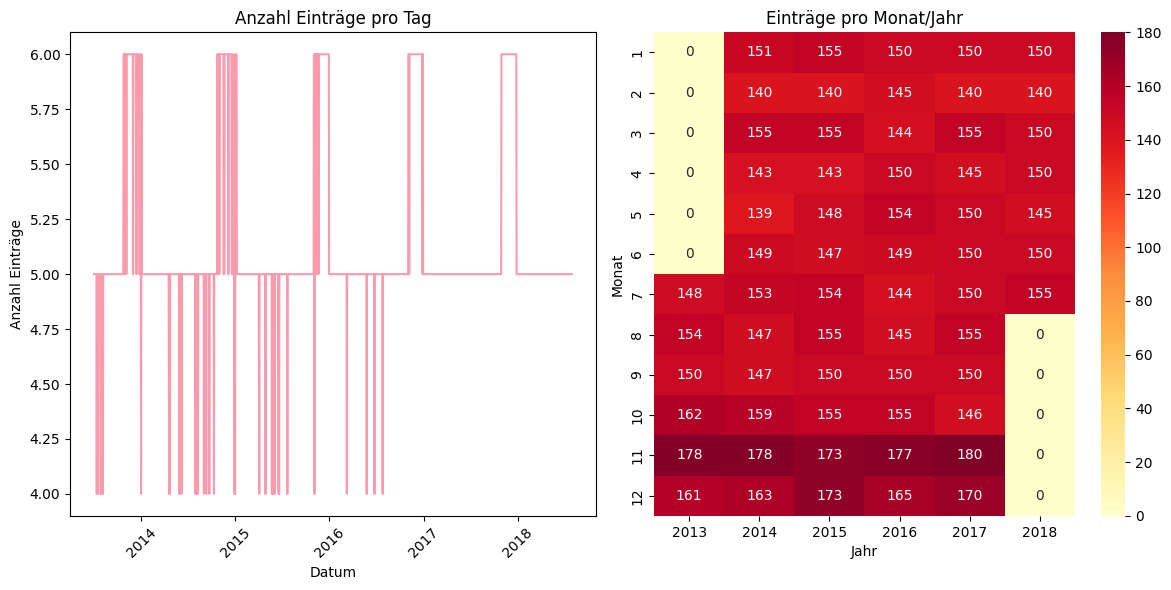


=== KONTINUITÄT PRO WARENGRUPPE ===
📊 Brot:
  Verfügbare Daten: 1819/1857 Tage
  Fehlende Daten: 38 Tage
  Vollständigkeit: 98.0%

📊 Brötchen:
  Verfügbare Daten: 1819/1857 Tage
  Fehlende Daten: 38 Tage
  Vollständigkeit: 98.0%

📊 Croissant:
  Verfügbare Daten: 1819/1857 Tage
  Fehlende Daten: 38 Tage
  Vollständigkeit: 98.0%

📊 Konditorei:
  Verfügbare Daten: 1766/1857 Tage
  Fehlende Daten: 91 Tage
  Vollständigkeit: 95.1%

📊 Kuchen:
  Verfügbare Daten: 1819/1857 Tage
  Fehlende Daten: 38 Tage
  Vollständigkeit: 98.0%

📊 Saisonbrot:
  Verfügbare Daten: 292/1857 Tage
  Fehlende Daten: 1565 Tage
  Vollständigkeit: 15.7%



In [108]:
# 1.4 ZEITREIHEN-KONTINUITÄT PRÜFUNG
print("=== ZEITREIHEN-KONTINUITÄT ANALYSE ===")

# Datum-Range ermitteln
min_date = df['Datum'].min()
max_date = df['Datum'].max()
date_range = pd.date_range(start=min_date, end=max_date, freq='D')

print(f"📅 Zeitraum: {min_date.strftime('%Y-%m-%d')} bis {max_date.strftime('%Y-%m-%d')}")
print(f"📊 Tage im Zeitraum: {len(date_range)}")
print(f"📊 Eindeutige Daten im Datensatz: {df['Datum'].nunique()}")

# Fehlende Daten identifizieren
dates_in_data = set(df['Datum'].dt.date)
all_dates = set(date_range.date)
missing_dates = sorted(all_dates - dates_in_data)

if missing_dates:
    print(f"\n⚠️ {len(missing_dates)} fehlende Daten gefunden:")
    if len(missing_dates) <= 20:
        for date in missing_dates:
            print(f"  - {date}")
    else:
        print(f"  Erste 10: {missing_dates[:10]}")
        print(f"  Letzte 10: {missing_dates[-10:]}")
        
    # Lücken in der Zeitreihe visualisieren
    plt.figure(figsize=(12, 6))
    date_counts = df['Datum'].value_counts().sort_index()
    
    plt.subplot(1, 2, 1)
    plt.plot(date_counts.index, date_counts.values, alpha=0.7)
    plt.title('Anzahl Einträge pro Tag')
    plt.xlabel('Datum')
    plt.ylabel('Anzahl Einträge')
    plt.xticks(rotation=45)
    
    # Heatmap für fehlende Daten nach Monat/Jahr
    df['Jahr'] = df['Datum'].dt.year
    df['Monat'] = df['Datum'].dt.month
    monthly_counts = df.groupby(['Jahr', 'Monat']).size().unstack(fill_value=0)
    
    plt.subplot(1, 2, 2)
    sns.heatmap(monthly_counts.T, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Einträge pro Monat/Jahr')
    plt.xlabel('Jahr')
    plt.ylabel('Monat')
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ Keine fehlenden Daten in der Zeitreihe!")

# Kontinuität pro Warengruppe prüfen
print(f"\n=== KONTINUITÄT PRO WARENGRUPPE ===")
warengruppen = df['Warengruppe_Name'].unique()

for wg in sorted(warengruppen):
    wg_data = df[df['Warengruppe_Name'] == wg]
    wg_dates = set(wg_data['Datum'].dt.date)
    missing_wg_dates = all_dates - wg_dates
    
    print(f"📊 {wg}:")
    print(f"  Verfügbare Daten: {len(wg_dates)}/{len(all_dates)} Tage")
    print(f"  Fehlende Daten: {len(missing_wg_dates)} Tage")
    print(f"  Vollständigkeit: {len(wg_dates)/len(all_dates)*100:.1f}%")
    print()

In [109]:
# 1.5 DATENBEREICH UND PLAUSIBILITÄT
print("=== DATENBEREICH UND PLAUSIBILITÄT ===")

# Numerische Spalten analysieren
print("📊 Deskriptive Statistiken für numerische Spalten:")
numeric_stats = df[numerical_cols].describe()
display(numeric_stats)

# Plausibilitätsprüfungen
print(f"\n=== PLAUSIBILITÄTSPRÜFUNGEN ===")

# Umsatz-Plausibilität
negative_sales = (df['Umsatz'] < 0).sum()
zero_sales = (df['Umsatz'] == 0).sum()
extreme_sales = (df['Umsatz'] > df['Umsatz'].quantile(0.99)).sum()

print(f"💰 Umsatz-Analyse:")
print(f"  Negative Umsätze: {negative_sales}")
print(f"  Null-Umsätze: {zero_sales}")
print(f"  Extreme Umsätze (>99% Quantil): {extreme_sales}")
print(f"  Umsatz-Spanne: {df['Umsatz'].min():.2f} - {df['Umsatz'].max():.2f}")

# Wetter-Plausibilität
temp_outliers = ((df['Temperatur'] < -20) | (df['Temperatur'] > 40)).sum()
wind_outliers = (df['Windgeschwindigkeit'] < 0).sum()
cloud_outliers = ((df['Bewoelkung'] < 0) | (df['Bewoelkung'] > 100)).sum()

print(f"\n🌤️ Wetter-Analyse:")
print(f"  Extreme Temperaturen (<-20°C oder >40°C): {temp_outliers}")
print(f"  Negative Windgeschwindigkeiten: {wind_outliers}")
print(f"  Bewölkung außerhalb 0-100%: {cloud_outliers}")

# Feiertage-Plausibilität
holiday_rate = (df['ist_feiertag'] == 1).sum() / len(df) * 100
print(f"\n🎉 Feiertage-Analyse:")
print(f"  Anteil Feiertage: {holiday_rate:.1f}%")
print(f"  Anzahl Feiertage: {(df['ist_feiertag'] == 1).sum()}")

print("\n" + "="*50)
print("✅ DATENQUALITÄTS-ZUSAMMENFASSUNG")
print("="*50)
print(f"📊 Datensatz: {df.shape[0]:,} Zeilen, {df.shape[1]} Spalten")
print(f"📅 Zeitraum: {(max_date - min_date).days} Tage")
print(f"🏪 Warengruppen: {len(warengruppen)}")
print(f"❌ Fehlende Werte: {missing_df['Fehlende_Werte'].sum()}")
print(f"🔄 Duplikate: {full_duplicates}")
print(f"📊 Datenqualität: {'Ausgezeichnet' if missing_df['Fehlende_Werte'].sum() == 0 and full_duplicates == 0 else 'Benötigt Aufmerksamkeit'}")

=== DATENBEREICH UND PLAUSIBILITÄT ===
📊 Deskriptive Statistiken für numerische Spalten:


,Jahr,Monat,Tag,Wochentag_Nr,Warengruppe,Temperatur,Windgeschwindigkeit,Bewoelkung,Wettercode_fehlt,ist_feiertag,...,Jahreszeit_Herbst,Wochentag_Nr.1,Wochentag_Monday,Wochentag_Tuesday,Wochentag_Wednesday,Wochentag_Thursday,Wochentag_Friday,Wochentag_Saturday,Wochentag_Sunday,Wettercode
count,9334.000000,9334.000000,9334.000000,9334.000000,9334.000000,9334.000000,9334.00000,9334.000000,9334.000000,9334.000000,...,9334.000000,9334.000000,9334.000000,9334.000000,9334.000000,9334.000000,9334.000000,9334.000000,9334.000000,9334.000000
mean,2015.524963,6.654810,15.710092,3.000536,3.088172,12.028483,10.97478,4.728161,35.066745,0.021534,...,0.258196,3.000536,0.141847,0.144097,0.143775,0.142918,0.140454,0.143133,0.143775,35.066745
std,1.521857,3.461902,8.746361,2.001044,1.489002,7.226626,4.12843,2.638115,26.804053,0.145164,...,0.437666,2.001044,0.348912,0.351207,0.350881,0.350008,0.347476,0.350227,0.350881,26.804053
min,2013.000000,1.000000,1.000000,0.000000,1.000000,-8.475000,3.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,1.000000,2.000000,6.250000,8.00000,3.000000,3.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2016.000000,7.000000,16.000000,3.000000,3.000000,11.656250,10.00000,6.000000,51.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,2017.000000,10.000000,23.000000,5.000000,4.000000,17.962500,13.00000,7.000000,53.000000,0.000000,...,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
max,2018.000000,12.000000,31.000000,6.000000,6.000000,31.437500,35.00000,8.000000,75.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000



=== PLAUSIBILITÄTSPRÜFUNGEN ===
💰 Umsatz-Analyse:
  Negative Umsätze: 0
  Null-Umsätze: 0
  Extreme Umsätze (>99% Quantil): 94
  Umsatz-Spanne: 7.05 - 1879.46

🌤️ Wetter-Analyse:
  Extreme Temperaturen (<-20°C oder >40°C): 0
  Negative Windgeschwindigkeiten: 0
  Bewölkung außerhalb 0-100%: 0

🎉 Feiertage-Analyse:
  Anteil Feiertage: 2.2%
  Anzahl Feiertage: 201

✅ DATENQUALITÄTS-ZUSAMMENFASSUNG
📊 Datensatz: 9,334 Zeilen, 35 Spalten
📅 Zeitraum: 1856 Tage
🏪 Warengruppen: 6
❌ Fehlende Werte: 0
🔄 Duplikate: 0
📊 Datenqualität: Ausgezeichnet


## 2. **Univariate Analyse**
- **Zielvariable (Umsatz)**: Verteilung, Ausreißer, Statistiken
- **Numerische Features**: Histogramme, Boxplots, Quartile
- **Kategorische Features**: Häufigkeitsverteilungen, Balkendiagramme

=== ZIELVARIABLE ANALYSE: UMSATZ ===
📊 Umsatz-Statistiken:
  Mittelwert: 206.75 €
  Median: 161.90 €
  Standardabweichung: 144.55 €
  Min: 7.05 €
  Max: 1879.46 €
  Spannweite: 1872.41 €

📊 Quartile:
  Q1 (25%): 96.90 €
  Q2 (50%): 161.90 €
  Q3 (75%): 280.64 €
  IQR: 183.75 €
  Ausreißer: 309 (3.3%)


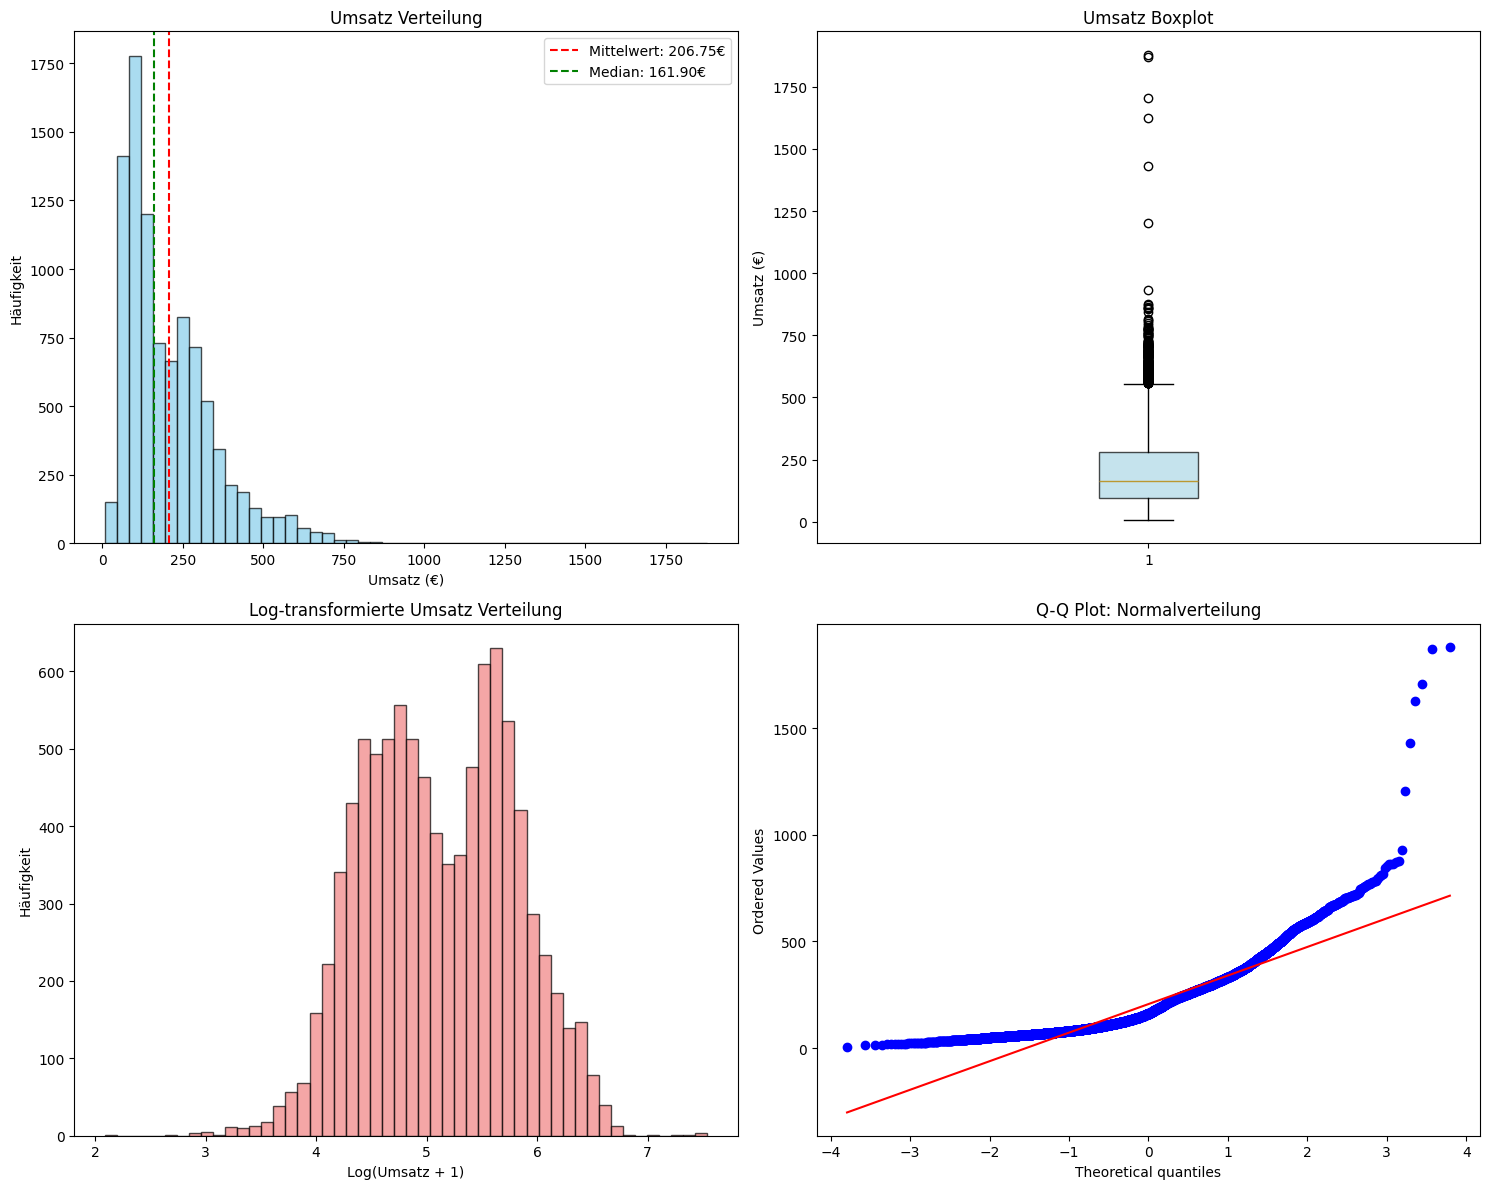


📊 Verteilungsform:
  Schiefe (Skewness): 1.832
  Kurtosis: 8.013
  Verteilung: Rechtsschief


In [110]:
# 2.1 ZIELVARIABLE ANALYSE (UMSATZ)
print("=== ZIELVARIABLE ANALYSE: UMSATZ ===")

# Grundstatistiken
print("📊 Umsatz-Statistiken:")
print(f"  Mittelwert: {df['Umsatz'].mean():.2f} €")
print(f"  Median: {df['Umsatz'].median():.2f} €")
print(f"  Standardabweichung: {df['Umsatz'].std():.2f} €")
print(f"  Min: {df['Umsatz'].min():.2f} €")
print(f"  Max: {df['Umsatz'].max():.2f} €")
print(f"  Spannweite: {df['Umsatz'].max() - df['Umsatz'].min():.2f} €")

# Quartile und Ausreißer
Q1 = df['Umsatz'].quantile(0.25)
Q3 = df['Umsatz'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Umsatz'] < lower_bound) | (df['Umsatz'] > upper_bound)]
print(f"\n📊 Quartile:")
print(f"  Q1 (25%): {Q1:.2f} €")
print(f"  Q2 (50%): {df['Umsatz'].median():.2f} €")
print(f"  Q3 (75%): {Q3:.2f} €")
print(f"  IQR: {IQR:.2f} €")
print(f"  Ausreißer: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

# Visualisierungen
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0,0].hist(df['Umsatz'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['Umsatz'].mean(), color='red', linestyle='--', label=f'Mittelwert: {df["Umsatz"].mean():.2f}€')
axes[0,0].axvline(df['Umsatz'].median(), color='green', linestyle='--', label=f'Median: {df["Umsatz"].median():.2f}€')
axes[0,0].set_title('Umsatz Verteilung')
axes[0,0].set_xlabel('Umsatz (€)')
axes[0,0].set_ylabel('Häufigkeit')
axes[0,0].legend()

# Boxplot
axes[0,1].boxplot(df['Umsatz'], vert=True, patch_artist=True, 
                  boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0,1].set_title('Umsatz Boxplot')
axes[0,1].set_ylabel('Umsatz (€)')

# Log-transformierte Verteilung (falls Schiefe vorhanden)
log_umsatz = np.log1p(df['Umsatz'])  # log1p für bessere Stabilität bei niedrigen Werten
axes[1,0].hist(log_umsatz, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,0].set_title('Log-transformierte Umsatz Verteilung')
axes[1,0].set_xlabel('Log(Umsatz + 1)')
axes[1,0].set_ylabel('Häufigkeit')

# Q-Q Plot für Normalverteilungstest
from scipy import stats
stats.probplot(df['Umsatz'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot: Normalverteilung')

plt.tight_layout()
plt.show()

# Schiefe und Kurtosis
from scipy.stats import skew, kurtosis
print(f"\n📊 Verteilungsform:")
print(f"  Schiefe (Skewness): {skew(df['Umsatz']):.3f}")
print(f"  Kurtosis: {kurtosis(df['Umsatz']):.3f}")
print(f"  Verteilung: {'Rechtsschief' if skew(df['Umsatz']) > 0.5 else 'Linksschief' if skew(df['Umsatz']) < -0.5 else 'Annähernd symmetrisch'}")

=== NUMERISCHE FEATURES ANALYSE ===
📊 Numerische Features: ['Jahr', 'Monat', 'Tag', 'Wochentag_Nr', 'Warengruppe', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Wettercode_fehlt', 'ist_feiertag', 'ist_kiwo', 'Warengruppe_Brot', 'Warengruppe_Brötchen', 'Warengruppe_Croissant', 'Warengruppe_Konditorei', 'Warengruppe_Kuchen', 'Warengruppe_Saisonbrot', 'Jahreszeit_Winter', 'Jahreszeit_Frühling', 'Jahreszeit_Sommer', 'Jahreszeit_Herbst', 'Wochentag_Nr.1', 'Wochentag_Monday', 'Wochentag_Tuesday', 'Wochentag_Wednesday', 'Wochentag_Thursday', 'Wochentag_Friday', 'Wochentag_Saturday', 'Wochentag_Sunday', 'Wettercode']

📊 Deskriptive Statistiken:


,Jahr,Monat,Tag,Wochentag_Nr,Warengruppe,Temperatur,Windgeschwindigkeit,Bewoelkung,Wettercode_fehlt,ist_feiertag,...,Wochentag_Nr.1,Wochentag_Monday,Wochentag_Tuesday,Wochentag_Wednesday,Wochentag_Thursday,Wochentag_Friday,Wochentag_Saturday,Wochentag_Sunday,Wettercode,Umsatz
count,9334.00,9334.00,9334.00,9334.0,9334.00,9334.00,9334.00,9334.00,9334.00,9334.00,...,9334.0,9334.00,9334.00,9334.00,9334.00,9334.00,9334.00,9334.00,9334.00,9334.00
mean,2015.52,6.65,15.71,3.0,3.09,12.03,10.97,4.73,35.07,0.02,...,3.0,0.14,0.14,0.14,0.14,0.14,0.14,0.14,35.07,206.75
std,1.52,3.46,8.75,2.0,1.49,7.23,4.13,2.64,26.80,0.15,...,2.0,0.35,0.35,0.35,0.35,0.35,0.35,0.35,26.80,144.55
min,2013.00,1.00,1.00,0.0,1.00,-8.48,3.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.05
25%,2014.00,4.00,8.00,1.0,2.00,6.25,8.00,3.00,3.00,0.00,...,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,96.90
50%,2016.00,7.00,16.00,3.0,3.00,11.66,10.00,6.00,51.00,0.00,...,3.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.00,161.90
75%,2017.00,10.00,23.00,5.0,4.00,17.96,13.00,7.00,53.00,0.00,...,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.00,280.64
max,2018.00,12.00,31.00,6.0,6.00,31.44,35.00,8.00,75.00,1.00,...,6.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,75.00,1879.46


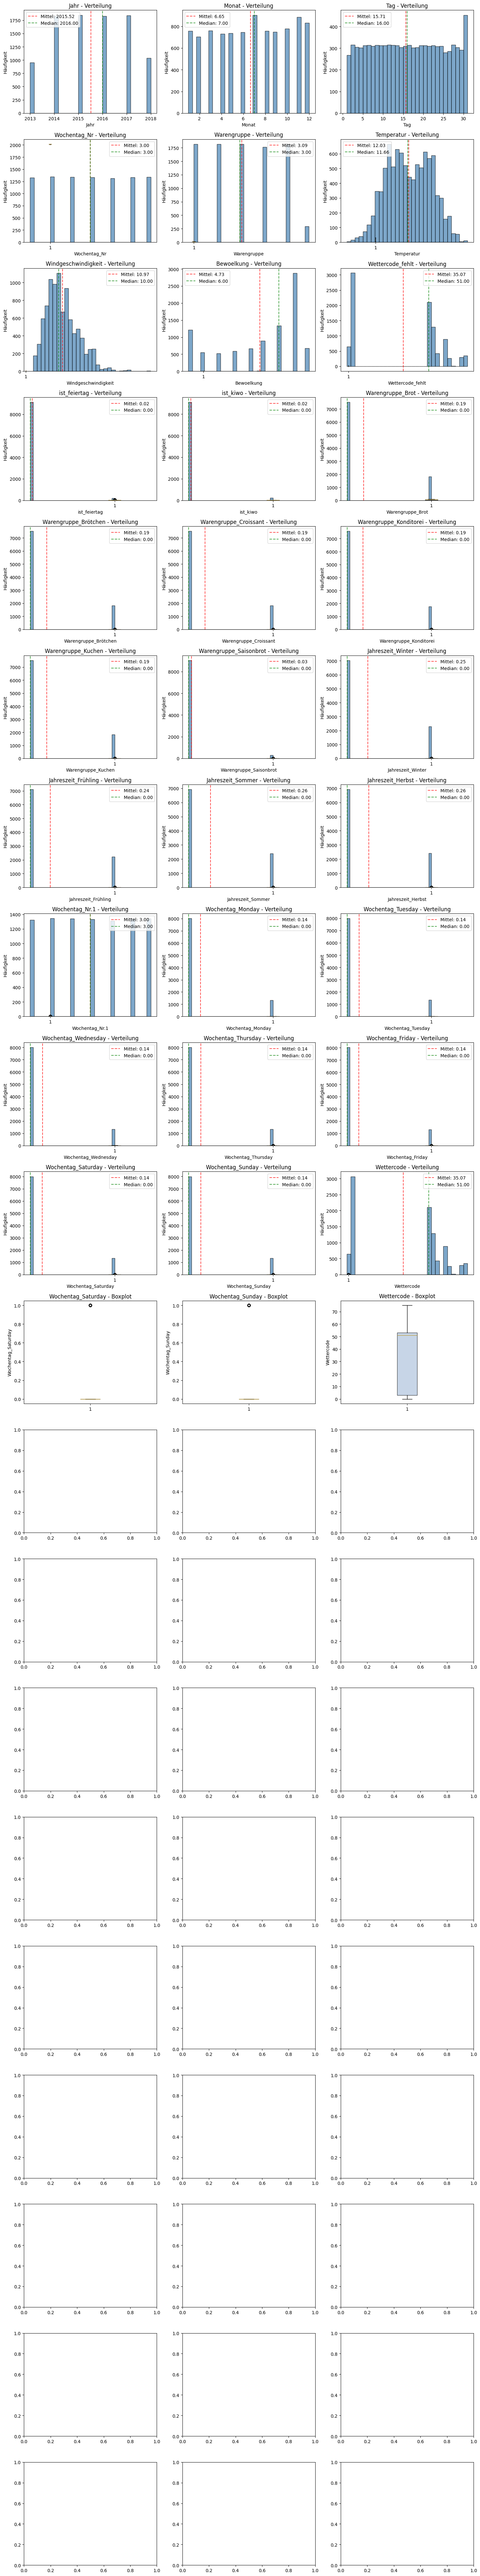


=== AUSREISSER-ANALYSE ===


,Feature,Ausreißer_Anzahl,Ausreißer_Prozent,Untere_Grenze,Obere_Grenze,Min_Ausreißer,Max_Ausreißer
0,Jahr,0,0.00,2009.50,2021.50,NaN,NaN
1,Monat,0,0.00,-5.00,19.00,NaN,NaN
2,Tag,0,0.00,-14.50,45.50,NaN,NaN
3,Wochentag_Nr,0,0.00,-5.00,11.00,NaN,NaN
4,Warengruppe,0,0.00,-1.00,7.00,NaN,NaN
5,Temperatur,0,0.00,-11.32,35.53,NaN,NaN
6,Windgeschwindigkeit,220,2.36,0.50,20.50,21.0,35.0
7,Bewoelkung,0,0.00,-3.00,13.00,NaN,NaN
8,Wettercode_fehlt,0,0.00,-72.00,128.00,NaN,NaN
9,ist_feiertag,201,2.15,0.00,0.00,1.0,1.0


In [111]:
# 2.2 NUMERISCHE FEATURES ANALYSE
print("=== NUMERISCHE FEATURES ANALYSE ===")

# Numerische Spalten (ohne Umsatz, da bereits analysiert)
numeric_features = [col for col in numerical_cols if col != 'Umsatz']
print(f"📊 Numerische Features: {numeric_features}")

# Detaillierte Statistiken für alle numerischen Features
print("\n📊 Deskriptive Statistiken:")
detailed_stats = df[numeric_features + ['Umsatz']].describe()
display(detailed_stats.round(2))

# Visualisierung aller numerischen Features
n_features = len(numeric_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(15, n_rows * 8))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, feature in enumerate(numeric_features):
    # Histogram
    row_hist = i
    axes[row_hist].hist(df[feature].dropna(), bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[row_hist].set_title(f'{feature} - Verteilung')
    axes[row_hist].set_xlabel(feature)
    axes[row_hist].set_ylabel('Häufigkeit')
    
    # Statistiken hinzufügen
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[row_hist].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mittel: {mean_val:.2f}')
    axes[row_hist].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    axes[row_hist].legend()
    
    # Boxplot
    row_box = i + n_cols
    if row_box < len(axes):
        axes[row_box].boxplot(df[feature].dropna(), vert=True, patch_artist=True,
                             boxprops=dict(facecolor='lightsteelblue', alpha=0.7))
        axes[row_box].set_title(f'{feature} - Boxplot')
        axes[row_box].set_ylabel(feature)

# Leere Subplots ausblenden
for j in range(len(numeric_features) * 2, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Ausreißer-Analyse für numerische Features
print("\n=== AUSREISSER-ANALYSE ===")
outlier_summary = []

for feature in numeric_features:
    data = df[feature].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_percentage = len(outliers) / len(data) * 100
    
    outlier_summary.append({
        'Feature': feature,
        'Ausreißer_Anzahl': len(outliers),
        'Ausreißer_Prozent': outlier_percentage,
        'Untere_Grenze': lower_bound,
        'Obere_Grenze': upper_bound,
        'Min_Ausreißer': outliers.min() if len(outliers) > 0 else None,
        'Max_Ausreißer': outliers.max() if len(outliers) > 0 else None
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df.round(2))

=== KATEGORISCHE FEATURES ANALYSE ===
📊 Kategorische Features: ['Wochentag', 'Warengruppe_Name', 'Jahreszeit']

📊 Wochentag:
Wochentag
Tuesday      1345
Wednesday    1342
Sunday       1342
Saturday     1336
Thursday     1334
Monday       1324
Friday       1311
Name: count, dtype: int64

Prozentuale Verteilung:
  Tuesday: 1345 (14.41%)
  Wednesday: 1342 (14.38%)
  Sunday: 1342 (14.38%)
  Saturday: 1336 (14.31%)
  Thursday: 1334 (14.29%)
  Monday: 1324 (14.18%)
  Friday: 1311 (14.05%)

📊 Warengruppe_Name:
Warengruppe_Name
Brot          1819
Brötchen      1819
Croissant     1819
Kuchen        1819
Konditorei    1766
Saisonbrot     292
Name: count, dtype: int64

Prozentuale Verteilung:
  Brot: 1819 (19.49%)
  Brötchen: 1819 (19.49%)
  Croissant: 1819 (19.49%)
  Kuchen: 1819 (19.49%)
  Konditorei: 1766 (18.92%)
  Saisonbrot: 292 (3.13%)

📊 Jahreszeit:
Jahreszeit
Herbst      2410
Sommer      2405
Winter      2293
Frühling    2226
Name: count, dtype: int64

Prozentuale Verteilung:
  Herbst: 2

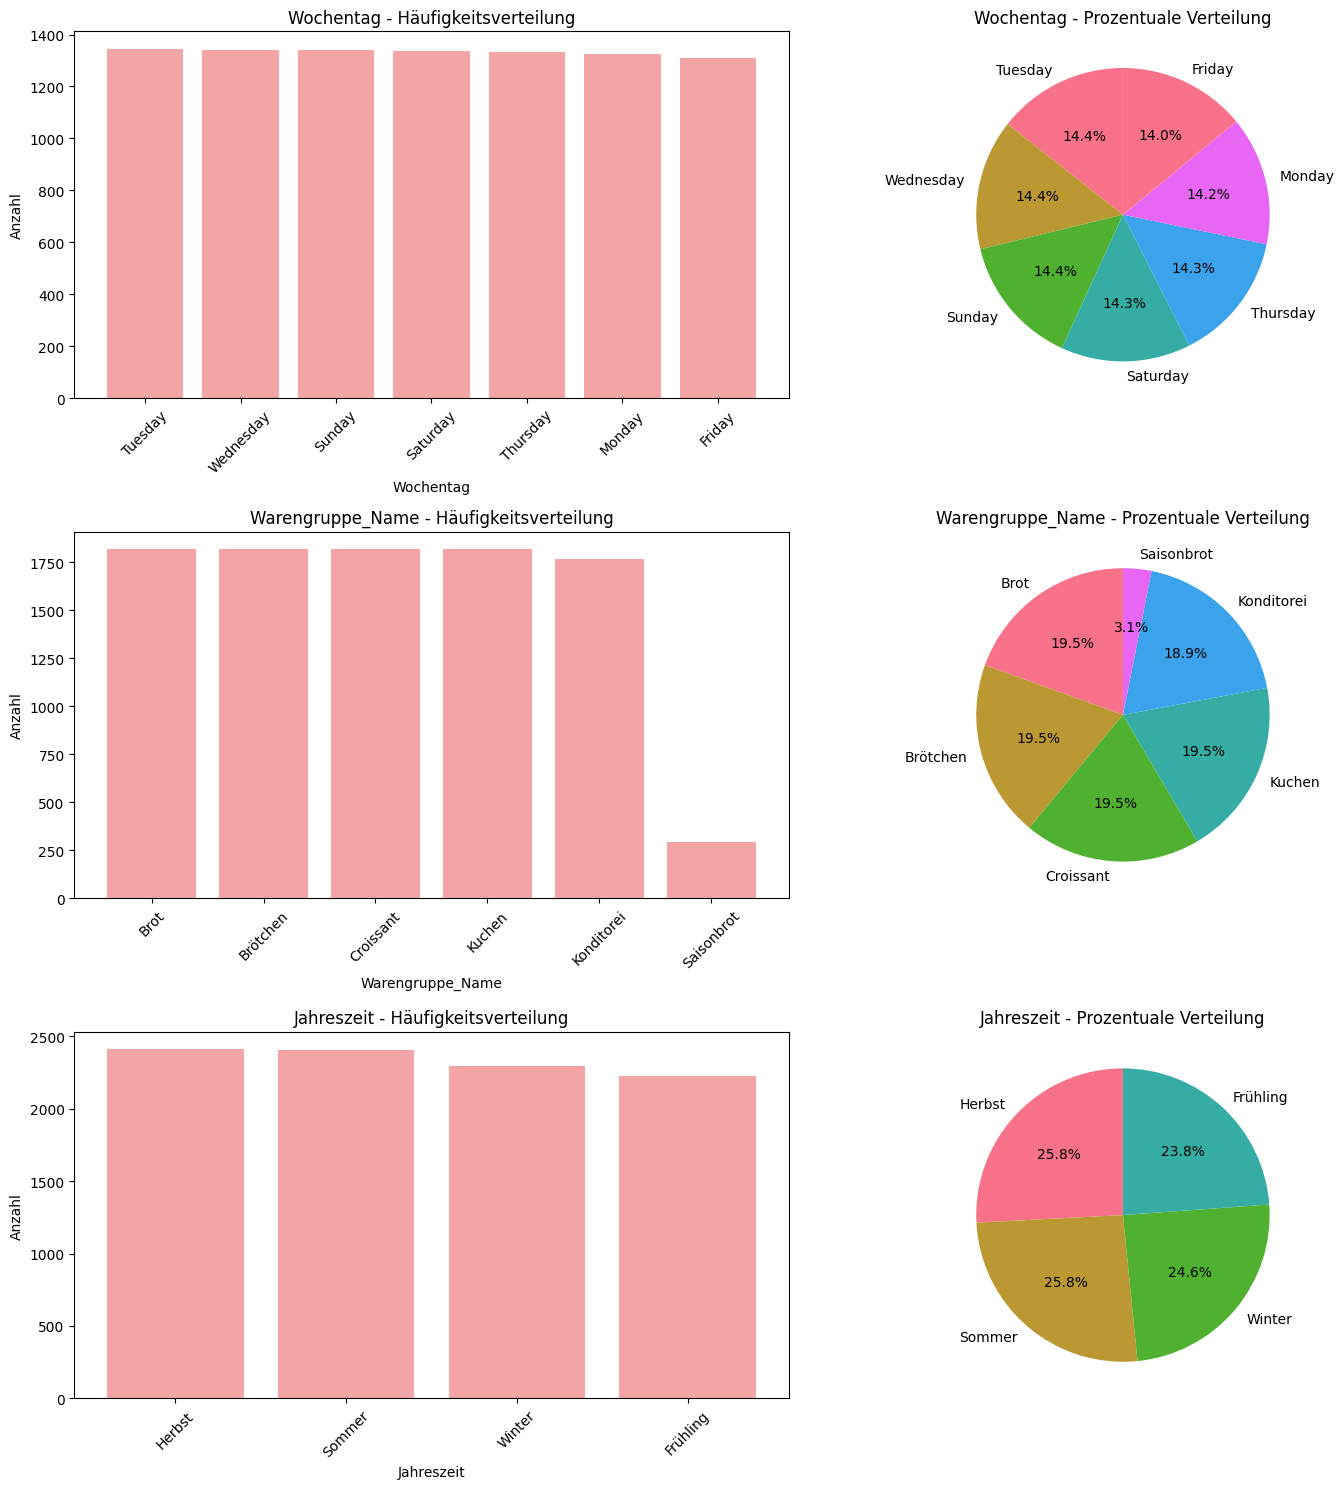


=== FEATURE-KARDINALITÄT ===


,Feature,Unique_Values,Kardinalität
0,Wochentag,7,Niedrig
1,Warengruppe_Name,6,Niedrig
2,Jahreszeit,4,Niedrig


In [112]:
# 2.3 KATEGORISCHE FEATURES ANALYSE
print("=== KATEGORISCHE FEATURES ANALYSE ===")

# Kategorische Features (ohne Datum)
categorical_features = [col for col in categorical_cols if col != 'Datum']
print(f"📊 Kategorische Features: {categorical_features}")

# Häufigkeitsverteilungen
for feature in categorical_features:
    print(f"\n📊 {feature}:")
    value_counts = df[feature].value_counts()
    print(value_counts)
    
    # Prozentuale Verteilung
    percentage = (value_counts / len(df) * 100).round(2)
    print(f"\nProzentuale Verteilung:")
    for value, count, pct in zip(value_counts.index, value_counts.values, percentage.values):
        print(f"  {value}: {count} ({pct}%)")

# Visualisierung kategorischer Features
fig, axes = plt.subplots(len(categorical_features), 2, figsize=(15, len(categorical_features) * 5))
if len(categorical_features) == 1:
    axes = [axes]

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    
    # Balkendiagramm
    axes[i][0].bar(range(len(value_counts)), value_counts.values, color='lightcoral', alpha=0.7)
    axes[i][0].set_title(f'{feature} - Häufigkeitsverteilung')
    axes[i][0].set_xlabel(feature)
    axes[i][0].set_ylabel('Anzahl')
    axes[i][0].set_xticks(range(len(value_counts)))
    axes[i][0].set_xticklabels(value_counts.index, rotation=45)
    
    # Tortendiagramm
    axes[i][1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i][1].set_title(f'{feature} - Prozentuale Verteilung')

plt.tight_layout()
plt.show()

# Binäre Features Analyse (ist_feiertag, etc.)
binary_features = []
for feature in categorical_features:
    unique_vals = df[feature].nunique()
    if unique_vals == 2:
        binary_features.append(feature)

if binary_features:
    print(f"\n=== BINÄRE FEATURES ANALYSE ===")
    for feature in binary_features:
        positive_rate = (df[feature] == 1).sum() / len(df) * 100 if df[feature].dtype in ['int64', 'float64'] else None
        if positive_rate:
            print(f"📊 {feature}: {positive_rate:.1f}% positive Fälle")

# Feature-Kardinalität (Anzahl unique Values)
print(f"\n=== FEATURE-KARDINALITÄT ===")
cardinality_info = []
for feature in categorical_features:
    unique_count = df[feature].nunique()
    cardinality_info.append({
        'Feature': feature,
        'Unique_Values': unique_count,
        'Kardinalität': 'Niedrig' if unique_count <= 10 else 'Mittel' if unique_count <= 50 else 'Hoch'
    })

cardinality_df = pd.DataFrame(cardinality_info)
display(cardinality_df)

## 3. **Bivariate Analyse**
- **Umsatz vs. Zeitfeatures**: Trends über Jahre, Monate, Wochentage
- **Umsatz vs. Warengruppen**: Performance nach Kategorien
- **Umsatz vs. Wetterdaten**: Temperatur, Wind, Bewölkung Einfluss
- **Umsatz vs. Events**: Feiertage, Sonntage, Kieler Woche Impact

=== BIVARIATE ANALYSE: UMSATZ VS. ZEIT ===
📊 Umsatz-Trends über Jahre:


,Durchschnitt,Gesamt,Anzahl_Tage
Jahr,,,
2013,223.82,213304.61,953
2014,232.63,424325.50,1824
2015,204.37,377678.37,1848
2016,192.58,352032.95,1828
2017,191.98,353443.18,1841
2018,200.97,209010.96,1040



📊 Saisonale Umsatz-Muster (Monate):


,Durchschnitt,Standardabweichung,Anzahl_Tage
Jan,167.97,103.52,756
Feb,185.52,110.49,705
Mär,182.28,109.34,759
Apr,197.35,125.93,731
Mai,211.43,138.08,736
Jun,226.63,149.77,745
Jul,271.83,180.27,904
Aug,288.52,183.16,756
Sep,213.94,126.51,747
Okt,210.00,128.78,777



📊 Wochentag-Umsatz-Muster:


,Durchschnitt,Standardabweichung,Anzahl_Tage
Wochentag_Name,,,
Monday,193.69,127.48,1324
Tuesday,187.94,126.55,1345
Wednesday,187.48,129.10,1342
Thursday,193.23,131.61,1334
Friday,196.80,127.45,1311
Saturday,241.32,166.97,1336
Sunday,246.50,178.54,1342


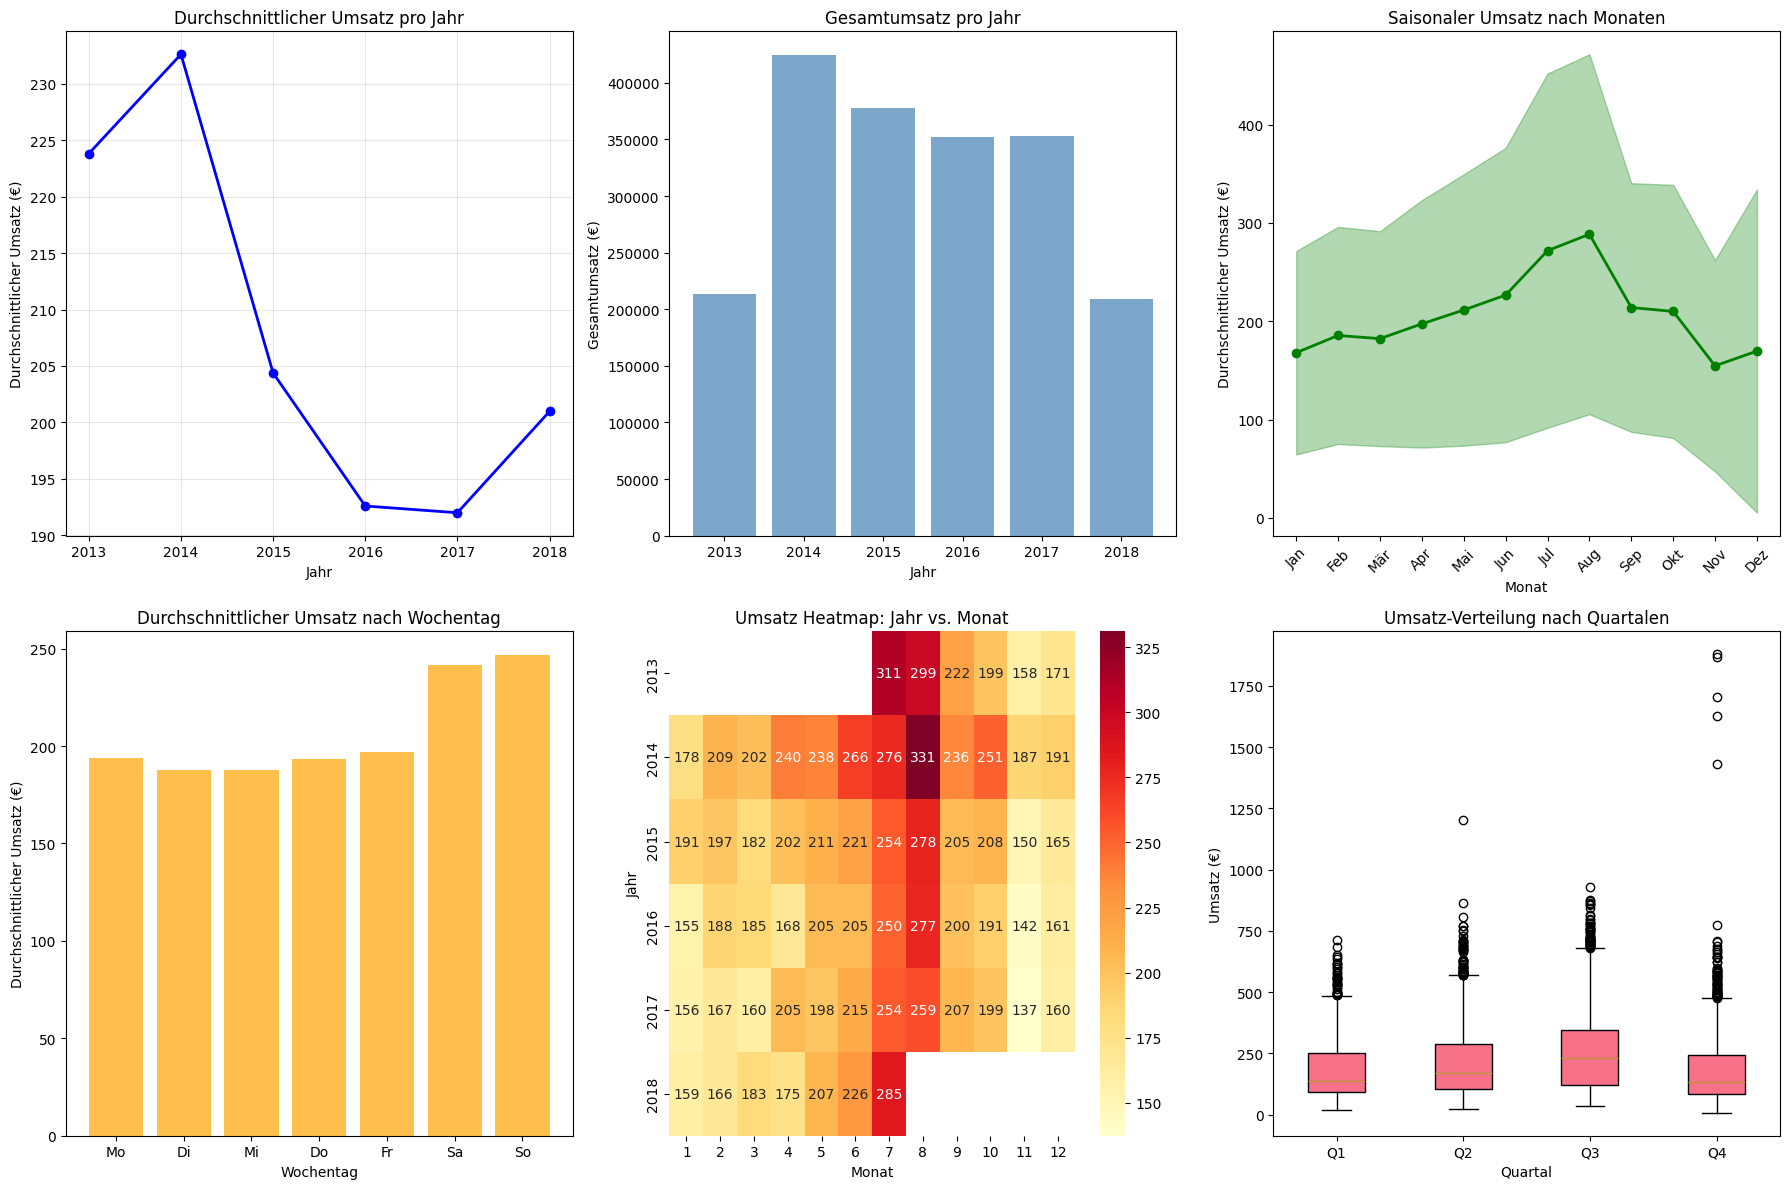


=== STATISTISCHE TESTS ===
📊 ANOVA-Test Monate: F=69.45, p=2.01e-150
   Interpretation: Signifikante Unterschiede zwischen Monaten
📊 ANOVA-Test Wochentage: F=43.35, p=1.60e-52
   Interpretation: Signifikante Unterschiede zwischen Wochentagen


In [113]:
# 3.1 UMSATZ VS. ZEITFEATURES
print("=== BIVARIATE ANALYSE: UMSATZ VS. ZEIT ===")

# Zeitfeatures erstellen falls nicht vorhanden
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month
df['Wochentag'] = df['Datum'].dt.dayofweek
df['Wochentag_Name'] = df['Datum'].dt.day_name()
df['Quartal'] = df['Datum'].dt.quarter
df['Kalenderwoche'] = df['Datum'].dt.isocalendar().week

# 3.1.1 Umsatz über Jahre
print("📊 Umsatz-Trends über Jahre:")
yearly_sales = df.groupby('Jahr')['Umsatz'].agg(['mean', 'sum', 'count']).round(2)
yearly_sales.columns = ['Durchschnitt', 'Gesamt', 'Anzahl_Tage']
display(yearly_sales)

# 3.1.2 Umsatz nach Monaten
print("\n📊 Saisonale Umsatz-Muster (Monate):")
monthly_sales = df.groupby('Monat')['Umsatz'].agg(['mean', 'std', 'count']).round(2)
monthly_sales.columns = ['Durchschnitt', 'Standardabweichung', 'Anzahl_Tage']
monthly_sales.index = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
display(monthly_sales)

# 3.1.3 Umsatz nach Wochentagen
print("\n📊 Wochentag-Umsatz-Muster:")
weekday_sales = df.groupby('Wochentag_Name')['Umsatz'].agg(['mean', 'std', 'count']).round(2)
weekday_sales.columns = ['Durchschnitt', 'Standardabweichung', 'Anzahl_Tage']
# Korrekte Reihenfolge der Wochentage
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)
display(weekday_sales)

# Visualisierungen
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Umsatz über Jahre
axes[0,0].plot(yearly_sales.index, yearly_sales['Durchschnitt'], marker='o', linewidth=2, color='blue')
axes[0,0].set_title('Durchschnittlicher Umsatz pro Jahr')
axes[0,0].set_xlabel('Jahr')
axes[0,0].set_ylabel('Durchschnittlicher Umsatz (€)')
axes[0,0].grid(True, alpha=0.3)

# Gesamtumsatz über Jahre
axes[0,1].bar(yearly_sales.index, yearly_sales['Gesamt'], color='steelblue', alpha=0.7)
axes[0,1].set_title('Gesamtumsatz pro Jahr')
axes[0,1].set_xlabel('Jahr')
axes[0,1].set_ylabel('Gesamtumsatz (€)')

# Saisonalität nach Monaten
axes[0,2].plot(monthly_sales.index, monthly_sales['Durchschnitt'], marker='o', linewidth=2, color='green')
axes[0,2].fill_between(monthly_sales.index, 
                       monthly_sales['Durchschnitt'] - monthly_sales['Standardabweichung'],
                       monthly_sales['Durchschnitt'] + monthly_sales['Standardabweichung'],
                       alpha=0.3, color='green')
axes[0,2].set_title('Saisonaler Umsatz nach Monaten')
axes[0,2].set_xlabel('Monat')
axes[0,2].set_ylabel('Durchschnittlicher Umsatz (€)')
axes[0,2].tick_params(axis='x', rotation=45)

# Wochentag-Muster
weekday_names_de = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
axes[1,0].bar(weekday_names_de, weekday_sales['Durchschnitt'].values, color='orange', alpha=0.7)
axes[1,0].set_title('Durchschnittlicher Umsatz nach Wochentag')
axes[1,0].set_xlabel('Wochentag')
axes[1,0].set_ylabel('Durchschnittlicher Umsatz (€)')

# Heatmap: Umsatz nach Monat und Jahr
monthly_yearly = df.groupby(['Jahr', 'Monat'])['Umsatz'].mean().unstack()
sns.heatmap(monthly_yearly, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Umsatz Heatmap: Jahr vs. Monat')
axes[1,1].set_xlabel('Monat')
axes[1,1].set_ylabel('Jahr')

# Boxplot: Umsatz nach Quartalen
quarterly_data = [df[df['Quartal'] == q]['Umsatz'] for q in [1, 2, 3, 4]]
axes[1,2].boxplot(quarterly_data, labels=['Q1', 'Q2', 'Q3', 'Q4'], patch_artist=True)
axes[1,2].set_title('Umsatz-Verteilung nach Quartalen')
axes[1,2].set_xlabel('Quartal')
axes[1,2].set_ylabel('Umsatz (€)')

plt.tight_layout()
plt.show()

# Statistische Tests für Unterschiede
from scipy.stats import f_oneway

# Test auf Unterschiede zwischen Monaten
monthly_groups = [df[df['Monat'] == month]['Umsatz'] for month in range(1, 13)]
f_stat_month, p_val_month = f_oneway(*monthly_groups)

# Test auf Unterschiede zwischen Wochentagen
weekday_groups = [df[df['Wochentag'] == day]['Umsatz'] for day in range(7)]
f_stat_weekday, p_val_weekday = f_oneway(*weekday_groups)

print(f"\n=== STATISTISCHE TESTS ===")
print(f"📊 ANOVA-Test Monate: F={f_stat_month:.2f}, p={p_val_month:.2e}")
print(f"   Interpretation: {'Signifikante Unterschiede zwischen Monaten' if p_val_month < 0.05 else 'Keine signifikanten Unterschiede'}")
print(f"📊 ANOVA-Test Wochentage: F={f_stat_weekday:.2f}, p={p_val_weekday:.2e}")
print(f"   Interpretation: {'Signifikante Unterschiede zwischen Wochentagen' if p_val_weekday < 0.05 else 'Keine signifikanten Unterschiede'}")

=== BIVARIATE ANALYSE: UMSATZ VS. WARENGRUPPEN ===
📊 Umsatz-Performance nach Warengruppen:


,Anzahl,Mittelwert,Median,Std_Abw,Minimum,Maximum,Gesamtumsatz
Warengruppe_Name,,,,,,,
Brötchen,1819,402.50,370.83,139.66,175.00,1203.43,732143.70
Kuchen,1819,276.80,265.96,99.47,121.49,1879.46,503491.03
Croissant,1819,163.34,142.81,75.58,37.74,565.94,297117.13
Brot,1819,122.14,120.05,40.30,23.11,416.79,222177.22
Konditorei,1766,87.95,79.99,35.32,27.43,430.50,155326.84
Saisonbrot,292,66.92,62.91,32.37,7.05,172.87,19539.66



📊 Anteil am Gesamtumsatz (1,929,795.58 €):
  Brötchen: 37.94% (732,143.70 €)
  Kuchen: 26.09% (503,491.03 €)
  Croissant: 15.4% (297,117.13 €)
  Brot: 11.51% (222,177.22 €)
  Konditorei: 8.05% (155,326.84 €)
  Saisonbrot: 1.01% (19,539.66 €)


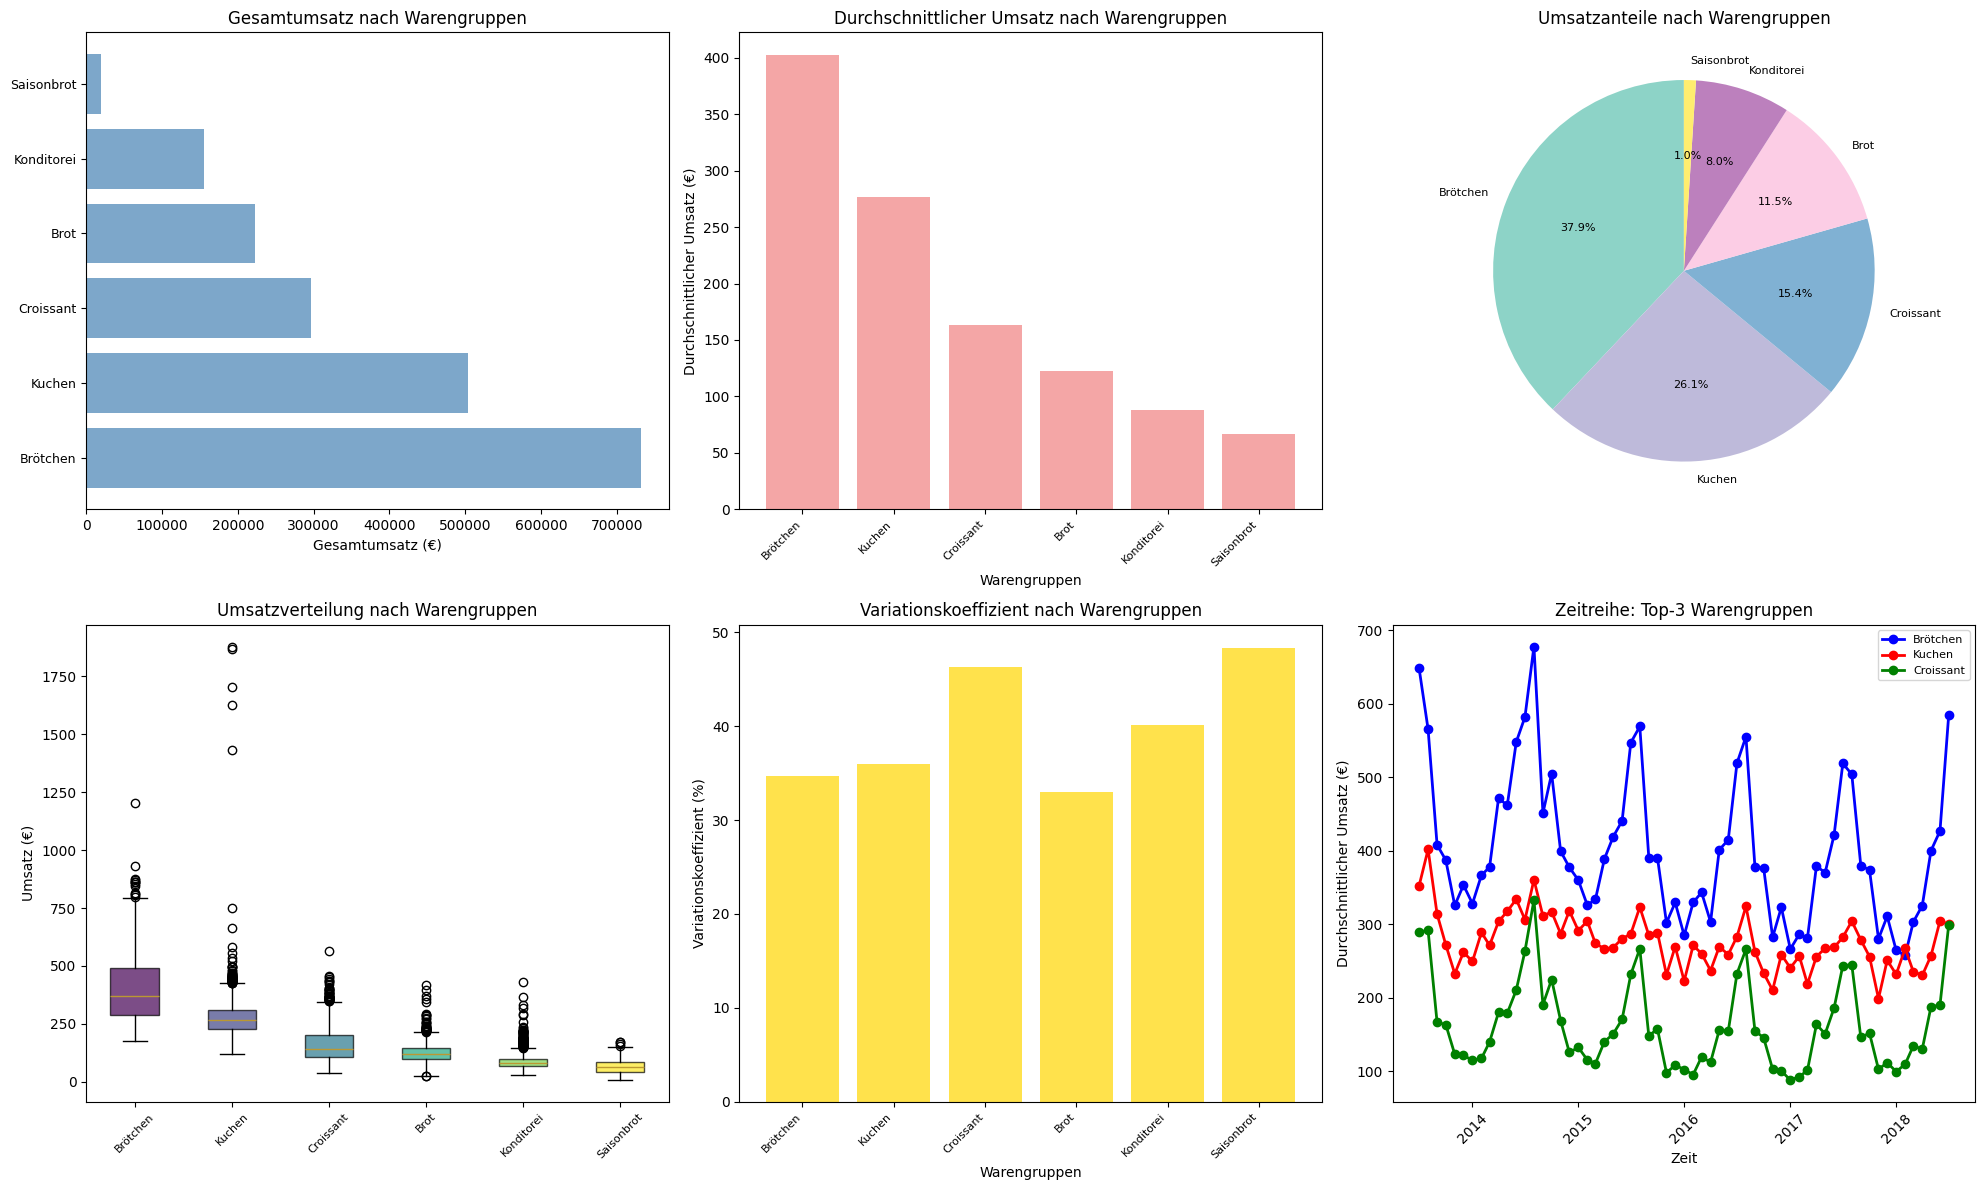


=== WARENGRUPPEN-KATEGORISIERUNG ===
🚀 High Performers (≥15% Umsatzanteil): 3
   - Brötchen: 37.94%
   - Kuchen: 26.09%
   - Croissant: 15.4%

📊 Medium Performers (5-15% Umsatzanteil): 2
   - Brot: 11.51%
   - Konditorei: 8.05%

📉 Low Performers (<5% Umsatzanteil): 1
   - Saisonbrot: 1.01%

=== STABILITÄT-ANALYSE (VARIATIONSKOEFFIZIENT) ===
✅ Stabile Warengruppen (Var-Koeff ≤50%): 6
⚠️ Volatile Warengruppen (Var-Koeff >50%): 0


In [114]:
# 3.2 UMSATZ VS. WARENGRUPPEN
print("=== BIVARIATE ANALYSE: UMSATZ VS. WARENGRUPPEN ===")

# Umsatz-Statistiken nach Warengruppen
warengruppen_stats = df.groupby('Warengruppe_Name')['Umsatz'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max', 'sum'
]).round(2)
warengruppen_stats.columns = ['Anzahl', 'Mittelwert', 'Median', 'Std_Abw', 'Minimum', 'Maximum', 'Gesamtumsatz']

# Sortierung nach Gesamtumsatz
warengruppen_stats = warengruppen_stats.sort_values('Gesamtumsatz', ascending=False)

print("📊 Umsatz-Performance nach Warengruppen:")
display(warengruppen_stats)

# Anteil am Gesamtumsatz
total_revenue = df['Umsatz'].sum()
warengruppen_stats['Anteil_Prozent'] = (warengruppen_stats['Gesamtumsatz'] / total_revenue * 100).round(2)

print(f"\n📊 Anteil am Gesamtumsatz ({total_revenue:,.2f} €):")
for idx, row in warengruppen_stats.iterrows():
    print(f"  {idx}: {row['Anteil_Prozent']}% ({row['Gesamtumsatz']:,.2f} €)")

# Visualisierungen
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Gesamtumsatz nach Warengruppen
axes[0,0].barh(warengruppen_stats.index, warengruppen_stats['Gesamtumsatz'], color='steelblue', alpha=0.7)
axes[0,0].set_title('Gesamtumsatz nach Warengruppen')
axes[0,0].set_xlabel('Gesamtumsatz (€)')
axes[0,0].tick_params(axis='y', labelsize=9)

# Durchschnittlicher Umsatz nach Warengruppen
axes[0,1].bar(range(len(warengruppen_stats)), warengruppen_stats['Mittelwert'], color='lightcoral', alpha=0.7)
axes[0,1].set_title('Durchschnittlicher Umsatz nach Warengruppen')
axes[0,1].set_xlabel('Warengruppen')
axes[0,1].set_ylabel('Durchschnittlicher Umsatz (€)')
axes[0,1].set_xticks(range(len(warengruppen_stats)))
axes[0,1].set_xticklabels(warengruppen_stats.index, rotation=45, ha='right', fontsize=8)

# Tortendiagramm für Umsatzanteile
colors = plt.cm.Set3(np.linspace(0, 1, len(warengruppen_stats)))
wedges, texts, autotexts = axes[0,2].pie(warengruppen_stats['Gesamtumsatz'], 
                                        labels=warengruppen_stats.index,
                                        autopct='%1.1f%%', 
                                        colors=colors,
                                        startangle=90)
axes[0,2].set_title('Umsatzanteile nach Warengruppen')
for autotext in autotexts:
    autotext.set_fontsize(8)
for text in texts:
    text.set_fontsize(8)

# Boxplot für Umsatzverteilungen
warengruppen_data = [df[df['Warengruppe_Name'] == wg]['Umsatz'] for wg in warengruppen_stats.index]
bp = axes[1,0].boxplot(warengruppen_data, patch_artist=True, labels=warengruppen_stats.index)
axes[1,0].set_title('Umsatzverteilung nach Warengruppen')
axes[1,0].set_ylabel('Umsatz (€)')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=8)

# Farben für Boxplot
colors_box = plt.cm.viridis(np.linspace(0, 1, len(bp['boxes'])))
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Variationskoeffizient (Stabilität)
warengruppen_stats['Var_Koeff'] = (warengruppen_stats['Std_Abw'] / warengruppen_stats['Mittelwert'] * 100).round(2)
axes[1,1].bar(range(len(warengruppen_stats)), warengruppen_stats['Var_Koeff'], color='gold', alpha=0.7)
axes[1,1].set_title('Variationskoeffizient nach Warengruppen')
axes[1,1].set_xlabel('Warengruppen')
axes[1,1].set_ylabel('Variationskoeffizient (%)')
axes[1,1].set_xticks(range(len(warengruppen_stats)))
axes[1,1].set_xticklabels(warengruppen_stats.index, rotation=45, ha='right', fontsize=8)

# Zeitreihe der Top-3 Warengruppen
top_3_warengruppen = warengruppen_stats.head(3).index
colors_line = ['blue', 'red', 'green']

for i, wg in enumerate(top_3_warengruppen):
    wg_monthly = df[df['Warengruppe_Name'] == wg].groupby(['Jahr', 'Monat'])['Umsatz'].mean()
    # Erstelle Datum für x-Achse
    dates = [datetime(year, month, 1) for year, month in wg_monthly.index]
    axes[1,2].plot(dates, wg_monthly.values, marker='o', label=wg, color=colors_line[i], linewidth=2)

axes[1,2].set_title('Zeitreihe: Top-3 Warengruppen')
axes[1,2].set_xlabel('Zeit')
axes[1,2].set_ylabel('Durchschnittlicher Umsatz (€)')
axes[1,2].legend(fontsize=8)
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Performance-Kategorisierung
print(f"\n=== WARENGRUPPEN-KATEGORISIERUNG ===")
high_performers = warengruppen_stats[warengruppen_stats['Anteil_Prozent'] >= 15]
medium_performers = warengruppen_stats[(warengruppen_stats['Anteil_Prozent'] >= 5) & 
                                      (warengruppen_stats['Anteil_Prozent'] < 15)]
low_performers = warengruppen_stats[warengruppen_stats['Anteil_Prozent'] < 5]

print(f"🚀 High Performers (≥15% Umsatzanteil): {len(high_performers)}")
for idx in high_performers.index:
    print(f"   - {idx}: {high_performers.loc[idx, 'Anteil_Prozent']}%")

print(f"\n📊 Medium Performers (5-15% Umsatzanteil): {len(medium_performers)}")
for idx in medium_performers.index:
    print(f"   - {idx}: {medium_performers.loc[idx, 'Anteil_Prozent']}%")

print(f"\n📉 Low Performers (<5% Umsatzanteil): {len(low_performers)}")
for idx in low_performers.index:
    print(f"   - {idx}: {low_performers.loc[idx, 'Anteil_Prozent']}%")

# Stabilität-Analyse
print(f"\n=== STABILITÄT-ANALYSE (VARIATIONSKOEFFIZIENT) ===")
stable_wg = warengruppen_stats[warengruppen_stats['Var_Koeff'] <= 50]
volatile_wg = warengruppen_stats[warengruppen_stats['Var_Koeff'] > 50]

print(f"✅ Stabile Warengruppen (Var-Koeff ≤50%): {len(stable_wg)}")
print(f"⚠️ Volatile Warengruppen (Var-Koeff >50%): {len(volatile_wg)}")

In [115]:
# 3.3 UMSATZ VS. WETTERDATEN
print("=== BIVARIATE ANALYSE: UMSATZ VS. WETTER ===")

# Wetter-Features identifizieren
weather_features = ['Temperatur', 'Windgeschwindigkeit', 'Bewoelkung']
available_weather = [col for col in weather_features if col in df.columns]

print(f"📊 Verfügbare Wetter-Features: {available_weather}")

if available_weather:
    # Korrelationen zwischen Umsatz und Wetter
    weather_corr = df[['Umsatz'] + available_weather].corr()['Umsatz'].drop('Umsatz')
    print(f"\n📊 Korrelationen Umsatz vs. Wetter:")
    for feature, corr in weather_corr.items():
        strength = 'stark' if abs(corr) > 0.5 else 'mittel' if abs(corr) > 0.3 : 'schwach'
        direction = 'positiv' if corr > 0 else 'negativ'
        print(f"  {feature}: {corr:.3f} ({strength}, {direction})")

    # Temperatur-Kategorien erstellen
    if 'Temperatur' in available_weather:
        df['Temp_Kategorie'] = pd.cut(df['Temperatur'], 
                                     bins=[-np.inf, 0, 10, 20, np.inf],
                                     labels=['Sehr kalt (≤0°C)', 'Kalt (1-10°C)', 
                                            'Mild (11-20°C)', 'Warm (>20°C)'])
        
        temp_sales = df.groupby('Temp_Kategorie')['Umsatz'].agg(['mean', 'std', 'count']).round(2)
        print(f"\n📊 Umsatz nach Temperatur-Kategorien:")
        display(temp_sales)

    # Bewölkungs-Kategorien
    if 'Bewoelkung' in available_weather:
        df['Bewoelkung_Kategorie'] = pd.cut(df['Bewoelkung'],
                                           bins=[0, 25, 50, 75, 100],
                                           labels=['Sonnig (0-25%)', 'Heiter (26-50%)',
                                                  'Bewölkt (51-75%)', 'Stark bewölkt (76-100%)'])
        
        cloud_sales = df.groupby('Bewoelkung_Kategorie')['Umsatz'].agg(['mean', 'std', 'count']).round(2)
        print(f"\n📊 Umsatz nach Bewölkungs-Kategorien:")
        display(cloud_sales)

    # Visualisierungen
    n_weather = len(available_weather)
    fig, axes = plt.subplots(2, n_weather, figsize=(6*n_weather, 12))
    if n_weather == 1:
        axes = axes.reshape(2, 1)

    for i, feature in enumerate(available_weather):
        # Scatterplot
        axes[0, i].scatter(df[feature], df['Umsatz'], alpha=0.5, color='steelblue')
        
        # Trendlinie hinzufügen
        z = np.polyfit(df[feature].dropna(), df[df[feature].notna()]['Umsatz'], 1)
        p = np.poly1d(z)
        axes[0, i].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)
        
        axes[0, i].set_xlabel(feature)
        axes[0, i].set_ylabel('Umsatz (€)')
        axes[0, i].set_title(f'Umsatz vs. {feature}\nKorrelation: {weather_corr[feature]:.3f}')
        axes[0, i].grid(True, alpha=0.3)

        # Binned Analysis - Durchschnittlicher Umsatz in Kategorien
        if feature == 'Temperatur':
            if 'Temp_Kategorie' in df.columns:
                cat_means = df.groupby('Temp_Kategorie')['Umsatz'].mean()
                axes[1, i].bar(range(len(cat_means)), cat_means.values, color='orange', alpha=0.7)
                axes[1, i].set_xticks(range(len(cat_means)))
                axes[1, i].set_xticklabels(cat_means.index, rotation=45, ha='right')
                axes[1, i].set_title('Durchschnittlicher Umsatz nach Temperatur-Kategorien')
                axes[1, i].set_ylabel('Durchschnittlicher Umsatz (€)')
        
        elif feature == 'Bewoelkung':
            if 'Bewoelkung_Kategorie' in df.columns:
                cat_means = df.groupby('Bewoelkung_Kategorie')['Umsatz'].mean()
                axes[1, i].bar(range(len(cat_means)), cat_means.values, color='lightblue', alpha=0.7)
                axes[1, i].set_xticks(range(len(cat_means)))
                axes[1, i].set_xticklabels(cat_means.index, rotation=45, ha='right')
                axes[1, i].set_title('Durchschnittlicher Umsatz nach Bewölkungs-Kategorien')
                axes[1, i].set_ylabel('Durchschnittlicher Umsatz (€)')
        
        else:
            # Für andere Features: Quintile-Analyse
            quintiles = pd.qcut(df[feature], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
            quintile_means = df.groupby(quintiles)['Umsatz'].mean()
            axes[1, i].bar(range(len(quintile_means)), quintile_means.values, color='green', alpha=0.7)
            axes[1, i].set_xticks(range(len(quintile_means)))
            axes[1, i].set_xticklabels(quintile_means.index)
            axes[1, i].set_title(f'Durchschnittlicher Umsatz nach {feature}-Quintilen')
            axes[1, i].set_ylabel('Durchschnittlicher Umsatz (€)')

    plt.tight_layout()
    plt.show()

    # Extreme Wetter-Ereignisse
    print(f"\n=== EXTREME WETTER-EREIGNISSE ===")
    
    if 'Temperatur' in available_weather:
        hot_days = df[df['Temperatur'] > df['Temperatur'].quantile(0.95)]
        cold_days = df[df['Temperatur'] < df['Temperatur'].quantile(0.05)]
        
        print(f"🌡️ Heiße Tage (>95% Quantil, >{df['Temperatur'].quantile(0.95):.1f}°C):")
        print(f"   Anzahl: {len(hot_days)}")
        print(f"   Durchschnittlicher Umsatz: {hot_days['Umsatz'].mean():.2f} €")
        print(f"   Vs. Gesamtdurchschnitt: {((hot_days['Umsatz'].mean() / df['Umsatz'].mean() - 1) * 100):+.1f}%")
        
        print(f"\n❄️ Kalte Tage (<5% Quantil, <{df['Temperatur'].quantile(0.05):.1f}°C):")
        print(f"   Anzahl: {len(cold_days)}")
        print(f"   Durchschnittlicher Umsatz: {cold_days['Umsatz'].mean():.2f} €")
        print(f"   Vs. Gesamtdurchschnitt: {((cold_days['Umsatz'].mean() / df['Umsatz'].mean() - 1) * 100):+.1f}%")

    if 'Windgeschwindigkeit' in available_weather:
        windy_days = df[df['Windgeschwindigkeit'] > df['Windgeschwindigkeit'].quantile(0.95)]
        print(f"\n💨 Sehr windige Tage (>95% Quantil, >{df['Windgeschwindigkeit'].quantile(0.95):.1f} km/h):")
        print(f"   Anzahl: {len(windy_days)}")
        print(f"   Durchschnittlicher Umsatz: {windy_days['Umsatz'].mean():.2f} €")
        print(f"   Vs. Gesamtdurchschnitt: {((windy_days['Umsatz'].mean() / df['Umsatz'].mean() - 1) * 100):+.1f}%")

    # Wetter-Kombinationen
    if len(available_weather) >= 2:
        print(f"\n=== WETTER-KOMBINATIONEN ===")
        
        if 'Temperatur' in available_weather and 'Bewoelkung' in available_weather:
            # Schöne Tage: Warm und wenig bewölkt
            nice_weather = df[(df['Temperatur'] > 15) & (df['Bewoelkung'] < 50)]
            print(f"☀️ Schöne Tage (>15°C, <50% Bewölkung):")
            print(f"   Anzahl: {len(nice_weather)}")
            print(f"   Durchschnittlicher Umsatz: {nice_weather['Umsatz'].mean():.2f} €")
            print(f"   Vs. Gesamtdurchschnitt: {((nice_weather['Umsatz'].mean() / df['Umsatz'].mean() - 1) * 100):+.1f}%")
            
            # Schlechte Tage: Kalt und stark bewölkt
            bad_weather = df[(df['Temperatur'] < 5) & (df['Bewoelkung'] > 75)]
            print(f"\n🌧️ Schlechte Tage (<5°C, >75% Bewölkung):")
            print(f"   Anzahl: {len(bad_weather)}")
            if len(bad_weather) > 0:
                print(f"   Durchschnittlicher Umsatz: {bad_weather['Umsatz'].mean():.2f} €")
                print(f"   Vs. Gesamtdurchschnitt: {((bad_weather['Umsatz'].mean() / df['Umsatz'].mean() - 1) * 100):+.1f}%")
            else:
                print("   Keine Tage gefunden")

else:
    print("⚠️ Keine Wetter-Features im Datensatz gefunden!")

SyntaxError: invalid syntax (58192236.py, line 15)

## 4. **Multivariate Analyse**
- Korrelationsmatrix aller numerischen Features
- Heatmaps für Interaktionseffekte
- Feature-Importance durch gegenseitige Information

In [ ]:
# 4.1 KORRELATIONSMATRIX
print("=== MULTIVARIATE ANALYSE: KORRELATIONEN ===")

# Alle numerischen Features für Korrelationsanalyse
numeric_features_analysis = ['Umsatz'] + [col for col in numerical_cols if col != 'Umsatz']
print(f"📊 Numerische Features für Analyse: {numeric_features_analysis}")

# Korrelationsmatrix berechnen
correlation_matrix = df[numeric_features_analysis].corr()

print(f"\n📊 Korrelationsmatrix:")
display(correlation_matrix.round(3))

# Starke Korrelationen identifizieren (>0.5 oder <-0.5)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            strong_correlations.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Korrelation': corr_value,
                'Stärke': 'sehr stark' if abs(corr_value) > 0.8 else 'stark'
            })

if strong_correlations:
    print(f"\n🔍 Starke Korrelationen (|r| > 0.5):")
    for corr in sorted(strong_correlations, key=lambda x: abs(x['Korrelation']), reverse=True):
        direction = 'positiv' if corr['Korrelation'] > 0 else 'negativ'
        print(f"  {corr['Feature_1']} ↔ {corr['Feature_2']}: {corr['Korrelation']:.3f} ({corr['Stärke']}, {direction})")

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Korrelationskoeffizient'})
plt.title('Korrelationsmatrix - Numerische Features')
plt.tight_layout()
plt.show()

# Korrelationen mit der Zielvariable (Umsatz)
umsatz_correlations = correlation_matrix['Umsatz'].drop('Umsatz').sort_values(key=abs, ascending=False)
print(f"\n📊 Features sortiert nach Korrelation mit Umsatz:")
for feature, corr in umsatz_correlations.items():
    strength = 'sehr stark' if abs(corr) > 0.8 else 'stark' if abs(corr) > 0.5 else 'mittel' if abs(corr) > 0.3 : 'schwach'
    direction = 'positiv' if corr > 0 else 'negativ'
    print(f"  {feature}: {corr:.3f} ({strength}, {direction})")

# Top Features visualisieren
top_features = umsatz_correlations.head(min(5, len(umsatz_correlations)))
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'blue' for x in top_features.values]
bars = plt.bar(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
plt.title('Top Features: Korrelation mit Umsatz')
plt.xlabel('Features')
plt.ylabel('Korrelationskoeffizient')
plt.xticks(range(len(top_features)), top_features.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Werte auf Balken anzeigen
for bar, value in zip(bars, top_features.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if value > 0 else -0.03), 
             f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top')

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (163394514.py, line 52)

=== INTERAKTIONSEFFEKTE UND FEATURE IMPORTANCE ===
📊 Feature Importance (Mutual Information):
📊 Feature Importance (Mutual Information):


,Feature,Mutual_Information
4,Warengruppe,0.6840
30,Warengruppe_Name_encoded,0.6840
12,Warengruppe_Brötchen,0.2663
15,Warengruppe_Kuchen,0.1905
14,Warengruppe_Konditorei,0.1793
11,Warengruppe_Brot,0.1323
1,Monat,0.0585
33,Monat,0.0584
31,Jahreszeit_encoded,0.0532
13,Warengruppe_Croissant,0.0530


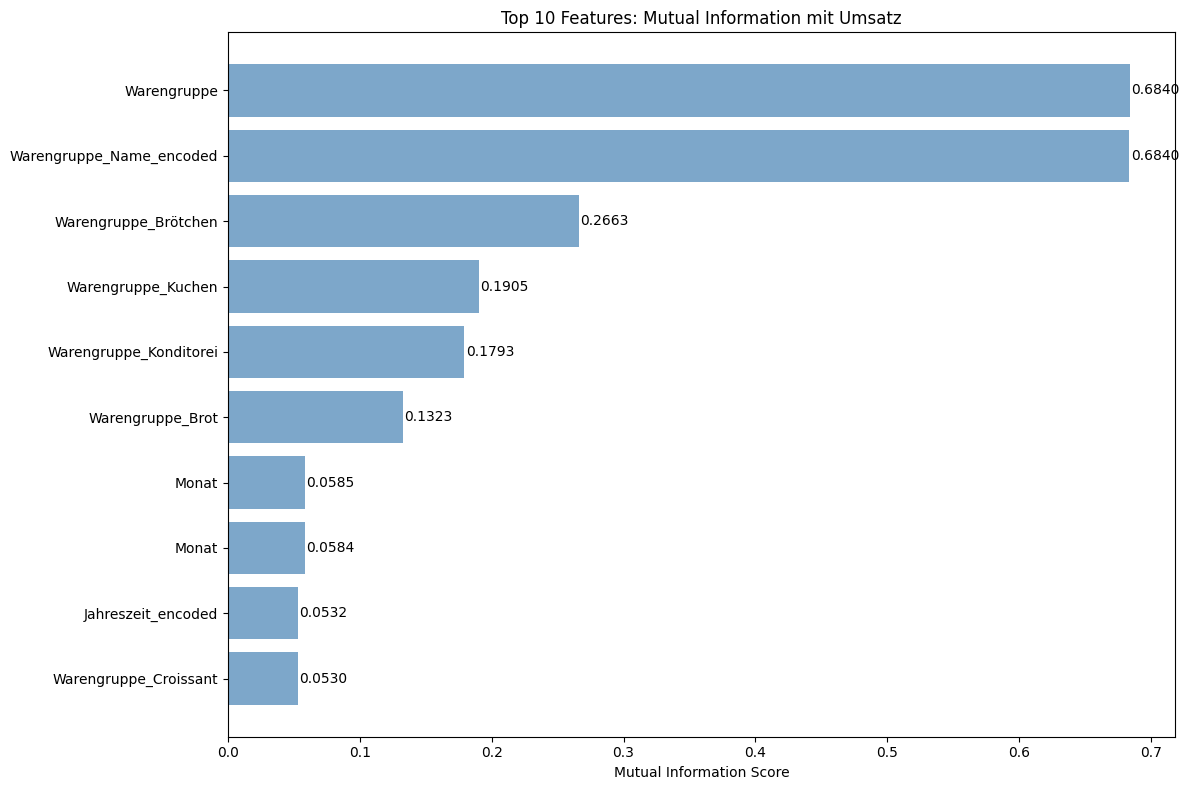


=== PAIRWISE FEATURE INTERACTIONS ===
📊 Pairwise Analysis für Top Features: ['Umsatz', 'Warengruppe_Brötchen', 'Warengruppe_Konditorei', 'Warengruppe_Brot', 'Warengruppe_Kuchen']


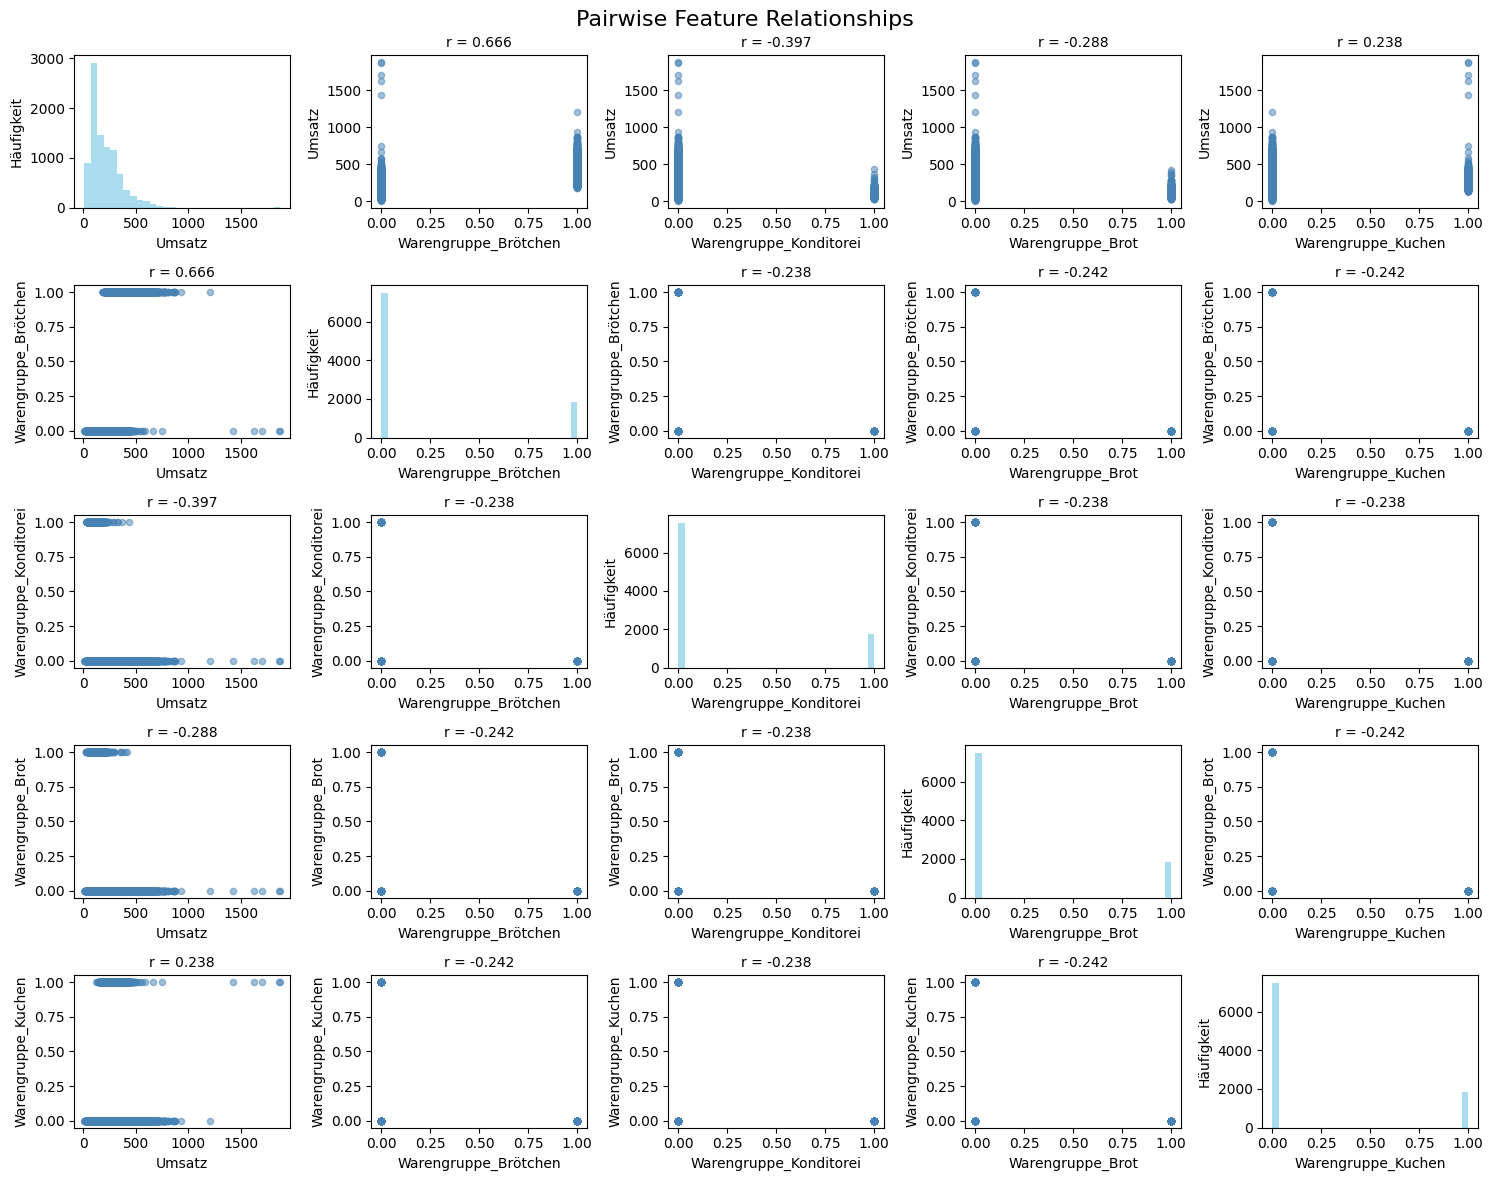


=== KATEGORISCHE vs NUMERISCHE INTERAKTIONEN ===
📊 Interaction: Warengruppe × Temperatur → Umsatz


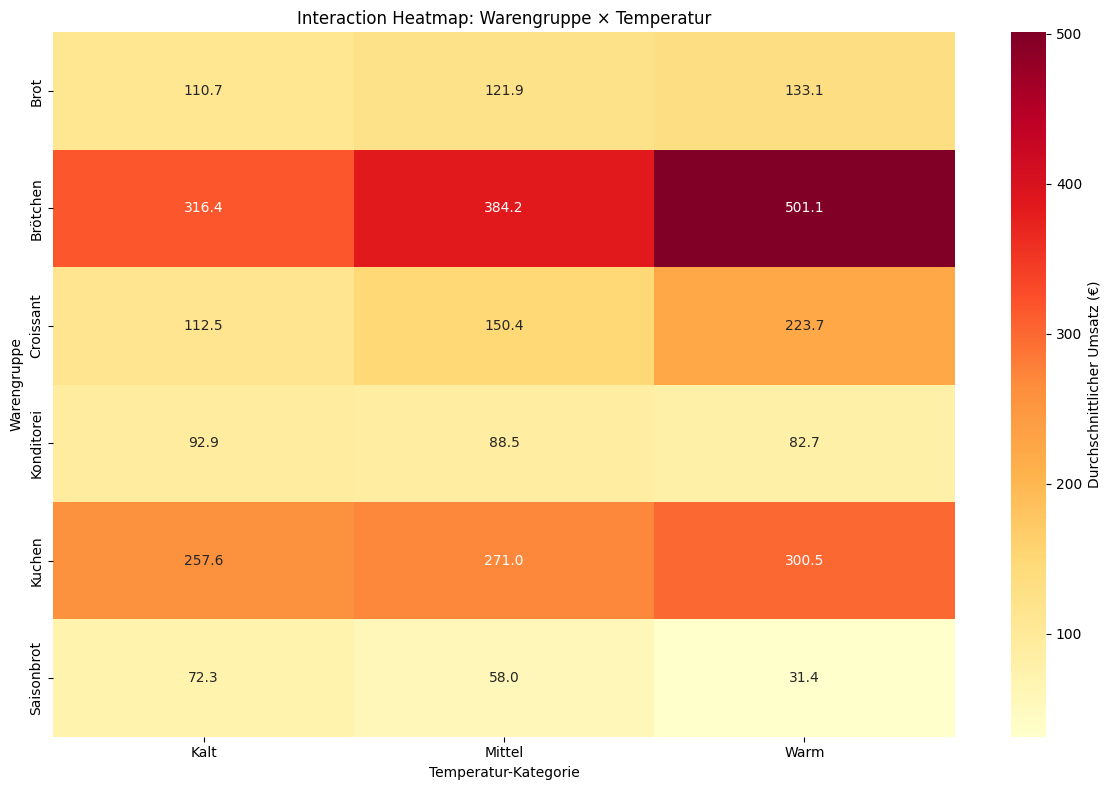


Interaction Statistiken:


mean  count
Warengruppe_Name Temperatur               
Brot             Kalt        110.71    589
                 Mittel      121.94    604
                 Warm        133.10    626
Brötchen         Kalt        316.42    589
                 Mittel      384.24    604
                 Warm        501.11    626
Croissant        Kalt        112.47    589
                 Mittel      150.39    604
                 Warm        223.70    626
Konditorei       Kalt         92.91    573
                 Mittel       88.47    589
                 Warm         82.75    604
Kuchen           Kalt        257.57    589
                 Mittel      270.98    604
                 Warm        300.50    626
Saisonbrot       Kalt         72.26    186
                 Mittel       58.05    104
                 Warm         31.38      2


=== MULTIKOLLINEARITÄT CHECK ===
📊 Variance Inflation Factor (VIF) - Alternative Berechnung:
📊 Variance Inflation Factor (VIF) - Alternative Berechnung:


,Feature,VIF,R_squared,Multikollinearität
4,Warengruppe,inf,1.0000,Sehr hoch
3,Wochentag_Nr,inf,1.0000,Sehr hoch
11,Warengruppe_Brot,inf,1.0000,Sehr hoch
12,Warengruppe_Brötchen,inf,1.0000,Sehr hoch
21,Wochentag_Nr.1,inf,1.0000,Sehr hoch
20,Jahreszeit_Herbst,inf,1.0000,Sehr hoch
19,Jahreszeit_Sommer,inf,1.0000,Sehr hoch
18,Jahreszeit_Frühling,inf,1.0000,Sehr hoch
17,Jahreszeit_Winter,inf,1.0000,Sehr hoch
16,Warengruppe_Saisonbrot,inf,1.0000,Sehr hoch



⚠️ Features mit hoher Multikollinearität (VIF > 10):
  - Warengruppe: VIF = inf
  - Wochentag_Nr: VIF = inf
  - Warengruppe_Brot: VIF = inf
  - Warengruppe_Brötchen: VIF = inf
  - Wochentag_Nr.1: VIF = inf
  - Jahreszeit_Herbst: VIF = inf
  - Jahreszeit_Sommer: VIF = inf
  - Jahreszeit_Frühling: VIF = inf
  - Jahreszeit_Winter: VIF = inf
  - Warengruppe_Saisonbrot: VIF = inf
  - Warengruppe_Kuchen: VIF = inf
  - Warengruppe_Konditorei: VIF = inf
  - Warengruppe_Croissant: VIF = inf
  - Wochentag_Thursday: VIF = inf
  - Wochentag_Monday: VIF = inf
  - Wochentag_Tuesday: VIF = inf
  - Wochentag_Wednesday: VIF = inf
  - Wochentag_Saturday: VIF = inf
  - Wochentag_Friday: VIF = inf
  - Wochentag_Sunday: VIF = inf


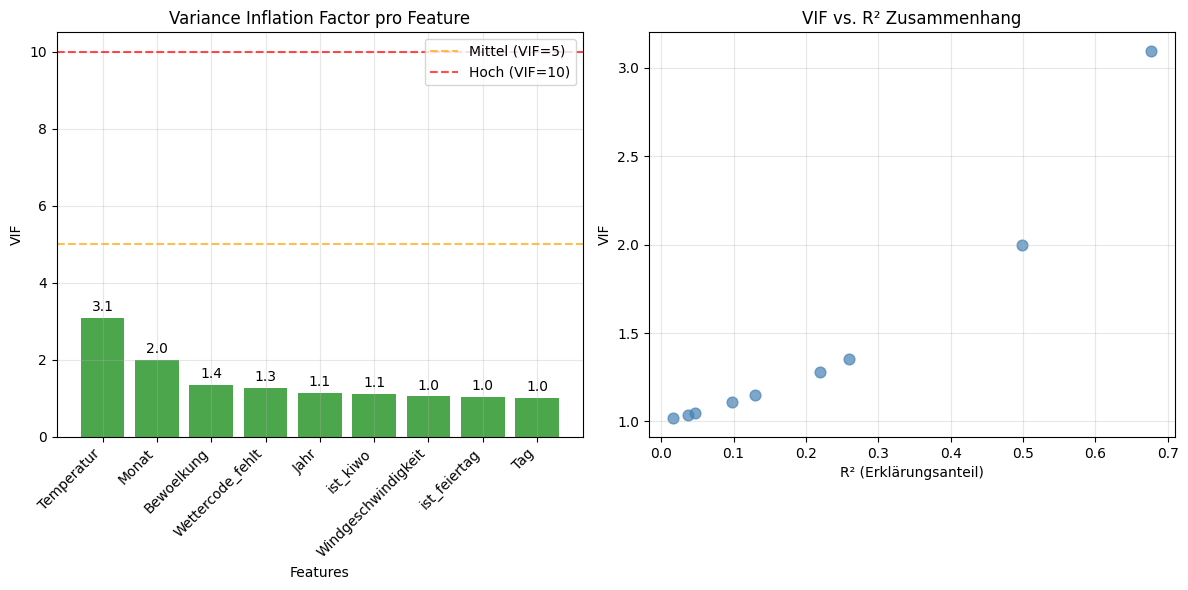


✅ MULTIVARIATE ANALYSE ABGESCHLOSSEN


In [ ]:
# 4.2 INTERAKTIONSEFFEKTE UND FEATURE IMPORTANCE
print("=== INTERAKTIONSEFFEKTE UND FEATURE IMPORTANCE ===")

# Feature Importance mit Mutual Information
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Daten für Feature Importance vorbereiten
features_for_mi = []
feature_names = []

# Numerische Features hinzufügen
for col in numeric_features_analysis:
    if col != 'Umsatz' and col in df.columns:
        features_for_mi.append(df[col].fillna(df[col].median()).values)
        feature_names.append(col)

# Kategorische Features encodieren und hinzufügen
le = LabelEncoder()
for col in categorical_features:
    if col in df.columns:
        encoded_feature = le.fit_transform(df[col].astype(str))
        features_for_mi.append(encoded_feature)
        feature_names.append(f"{col}_encoded")

# Zeitfeatures hinzufügen
time_features = ['Jahr', 'Monat', 'Wochentag', 'Quartal']
for col in time_features:
    if col in df.columns:
        features_for_mi.append(df[col].values)
        feature_names.append(col)

if features_for_mi:
    # Feature Matrix erstellen
    X = np.column_stack(features_for_mi)
    y = df['Umsatz'].values
    
    # Mutual Information berechnen
    mi_scores = mutual_info_regression(X, y, random_state=42)
    
    # Feature Importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Mutual_Information': mi_scores
    }).sort_values('Mutual_Information', ascending=False)
    
    print(f"📊 Feature Importance (Mutual Information):")
    display(feature_importance.round(4))
    
    # Top 10 Features visualisieren
    top_10_features = feature_importance.head(10)
    plt.figure(figsize=(12, 8))
    bars = plt.barh(range(len(top_10_features)), top_10_features['Mutual_Information'], 
                    color='steelblue', alpha=0.7)
    plt.yticks(range(len(top_10_features)), top_10_features['Feature'])
    plt.xlabel('Mutual Information Score')
    plt.title('Top 10 Features: Mutual Information mit Umsatz')
    plt.gca().invert_yaxis()
    
    # Werte auf Balken anzeigen
    for i, (bar, value) in enumerate(zip(bars, top_10_features['Mutual_Information'])):
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                 f'{value:.4f}', va='center', ha='left')
    
    plt.tight_layout()
    plt.show()

# 4.3 PAIRWISE INTERACTIONS
print(f"\n=== PAIRWISE FEATURE INTERACTIONS ===")

# Top numerische Features für Pairplot
top_numeric = [col for col in umsatz_correlations.head(4).index if col in df.columns]
if 'Umsatz' not in top_numeric:
    top_numeric = ['Umsatz'] + top_numeric

print(f"📊 Pairwise Analysis für Top Features: {top_numeric}")

if len(top_numeric) >= 2:
    # Pairplot
    plt.figure(figsize=(15, 12))
    
    # Correlation Pairplot
    pairplot_data = df[top_numeric].dropna()
    n_features = len(top_numeric)
    
    for i in range(n_features):
        for j in range(n_features):
            plt.subplot(n_features, n_features, i * n_features + j + 1)
            
            if i == j:
                # Diagonal: Histogramm
                plt.hist(pairplot_data[top_numeric[i]], bins=30, alpha=0.7, color='skyblue')
                plt.xlabel(top_numeric[i])
                plt.ylabel('Häufigkeit')
            else:
                # Off-diagonal: Scatterplot
                plt.scatter(pairplot_data[top_numeric[j]], pairplot_data[top_numeric[i]], 
                           alpha=0.5, s=20, color='steelblue')
                plt.xlabel(top_numeric[j])
                plt.ylabel(top_numeric[i])
                
                # Korrelation anzeigen
                corr = pairplot_data[top_numeric[i]].corr(pairplot_data[top_numeric[j]])
                plt.title(f'r = {corr:.3f}', fontsize=10)
    
    plt.suptitle('Pairwise Feature Relationships', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

# 4.4 KATEGORISCHE vs NUMERISCHE INTERAKTIONEN
print(f"\n=== KATEGORISCHE vs NUMERISCHE INTERAKTIONEN ===")

# Analyse von Warengruppen vs Top numerische Features
if len(available_weather) > 0 and 'Warengruppe_Name' in df.columns:
    # Beispiel: Temperatur vs Warengruppen vs Umsatz
    if 'Temperatur' in available_weather:
        print("📊 Interaction: Warengruppe × Temperatur → Umsatz")
        
        # Temperatur in Kategorien einteilen
        temp_bins = pd.qcut(df['Temperatur'], q=3, labels=['Kalt', 'Mittel', 'Warm'])
        
        # Pivot-Tabelle für Heatmap
        interaction_pivot = df.groupby(['Warengruppe_Name', temp_bins])['Umsatz'].mean().unstack()
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(interaction_pivot, annot=True, fmt='.1f', cmap='YlOrRd', 
                    cbar_kws={'label': 'Durchschnittlicher Umsatz (€)'})
        plt.title('Interaction Heatmap: Warengruppe × Temperatur')
        plt.xlabel('Temperatur-Kategorie')
        plt.ylabel('Warengruppe')
        plt.tight_layout()
        plt.show()
        
        # Statistik der Interaktion
        interaction_stats = df.groupby(['Warengruppe_Name', temp_bins])['Umsatz'].agg(['mean', 'count'])
        print(f"\nInteraction Statistiken:")
        display(interaction_stats.round(2))

# 4.5 MULTIKOLLINEARITÄT CHECK
print(f"\n=== MULTIKOLLINEARITÄT CHECK ===")

if len(numeric_features_analysis) > 2:
    # Alternative VIF-Berechnung ohne statsmodels
    # VIF = 1 / (1 - R²) wobei R² aus der Regression eines Features auf alle anderen kommt
    
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    
    # Daten vorbereiten (ohne NaN)
    vif_data = df[numeric_features_analysis].dropna()
    
    # VIF für jedes Feature berechnen (außer Umsatz)
    vif_results = []
    features_without_target = [col for col in vif_data.columns if col != 'Umsatz']
    
    for target_feature in features_without_target:
        try:
            # Features für Regression (alle außer dem aktuellen Feature)
            predictor_features = [col for col in features_without_target if col != target_feature]
            
            if len(predictor_features) > 0:
                X = vif_data[predictor_features].values
                y = vif_data[target_feature].values
                
                # Lineare Regression
                lr = LinearRegression()
                lr.fit(X, y)
                y_pred = lr.predict(X)
                
                # R² berechnen
                r_squared = r2_score(y, y_pred)
                
                # VIF = 1 / (1 - R²)
                if r_squared < 0.999:  # Vermeide Division durch nahezu Null
                    vif_value = 1 / (1 - r_squared)
                else:
                    vif_value = float('inf')  # Sehr hohe Multikollinearität
                
                vif_results.append({
                    'Feature': target_feature,
                    'VIF': vif_value,
                    'R_squared': r_squared,
                    'Multikollinearität': 'Sehr hoch' if vif_value > 20 else 'Hoch' if vif_value > 10 else 'Mittel' if vif_value > 5 else 'Niedrig'
                })
            else:
                vif_results.append({
                    'Feature': target_feature,
                    'VIF': 1.0,
                    'R_squared': 0.0,
                    'Multikollinearität': 'Niedrig'
                })
        except Exception as e:
            vif_results.append({
                'Feature': target_feature,
                'VIF': np.nan,
                'R_squared': np.nan,
                'Multikollinearität': 'Nicht berechenbar'
            })
    
    # VIF DataFrame erstellen und sortieren
    vif_df = pd.DataFrame(vif_results)
    vif_df = vif_df.sort_values('VIF', ascending=False, na_position='last')
    
    print(f"📊 Variance Inflation Factor (VIF) - Alternative Berechnung:")
    display(vif_df.round(4))
    
    # VIF Interpretation
    high_vif = vif_df[vif_df['VIF'] > 10]
    medium_vif = vif_df[(vif_df['VIF'] > 5) & (vif_df['VIF'] <= 10)]
    
    if not high_vif.empty:
        print(f"\n⚠️ Features mit hoher Multikollinearität (VIF > 10):")
        for _, row in high_vif.iterrows():
            if not pd.isna(row['VIF']):
                print(f"  - {row['Feature']}: VIF = {row['VIF']:.2f}")
    
    if not medium_vif.empty:
        print(f"\n⚡ Features mit mittlerer Multikollinearität (5 < VIF ≤ 10):")
        for _, row in medium_vif.iterrows():
            if not pd.isna(row['VIF']):
                print(f"  - {row['Feature']}: VIF = {row['VIF']:.2f}")
    
    if high_vif.empty and medium_vif.empty:
        print(f"\n✅ Keine kritische Multikollinearität gefunden (alle VIF ≤ 5)")
    
    # VIF Visualisierung
    valid_vif = vif_df[~pd.isna(vif_df['VIF']) & (vif_df['VIF'] != float('inf'))]
    
    if not valid_vif.empty:
        plt.figure(figsize=(12, 6))
        
        # VIF Balkendiagramm
        plt.subplot(1, 2, 1)
        colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in valid_vif['VIF']]
        bars = plt.bar(range(len(valid_vif)), valid_vif['VIF'], color=colors, alpha=0.7)
        plt.xlabel('Features')
        plt.ylabel('VIF')
        plt.title('Variance Inflation Factor pro Feature')
        plt.xticks(range(len(valid_vif)), valid_vif['Feature'], rotation=45, ha='right')
        plt.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='Mittel (VIF=5)')
        plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='Hoch (VIF=10)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Werte auf Balken anzeigen
        for bar, value in zip(bars, valid_vif['VIF']):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                     f'{value:.1f}', ha='center', va='bottom')
        
        # R² Scatter Plot
        plt.subplot(1, 2, 2)
        plt.scatter(valid_vif['R_squared'], valid_vif['VIF'], alpha=0.7, s=60, color='steelblue')
        plt.xlabel('R² (Erklärungsanteil)')
        plt.ylabel('VIF')
        plt.title('VIF vs. R² Zusammenhang')
        plt.grid(True, alpha=0.3)
        
        # Annotationen für Features mit hohem VIF
        for _, row in valid_vif.iterrows():
            if row['VIF'] > 5:
                plt.annotate(row['Feature'], (row['R_squared'], row['VIF']), 
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
        
        plt.tight_layout()
        plt.show()

else:
    print("⚠️ Nicht genügend numerische Features für VIF-Analyse")

print(f"\n" + "="*60)
print("✅ MULTIVARIATE ANALYSE ABGESCHLOSSEN")
print("="*60)

## 5. **Zeitreihenanalyse**
- Saisonalität erkennen (täglich, wöchentlich, monatlich, jährlich)
- Trends über den gesamten Zeitraum
- Anomalien und Ausreißer in der Zeitreihe
- Autokorrelation und Lag-Effekte

=== ZEITREIHENANALYSE: SAISONALITÄT ===
📊 Zeitreihen-Info:
  Zeitraum: 2013-07-01 00:00:00 bis 2018-07-31 00:00:00
  Anzahl Tage: 1819
  Durchschnittlicher Tagesumsatz: 1060.91 €


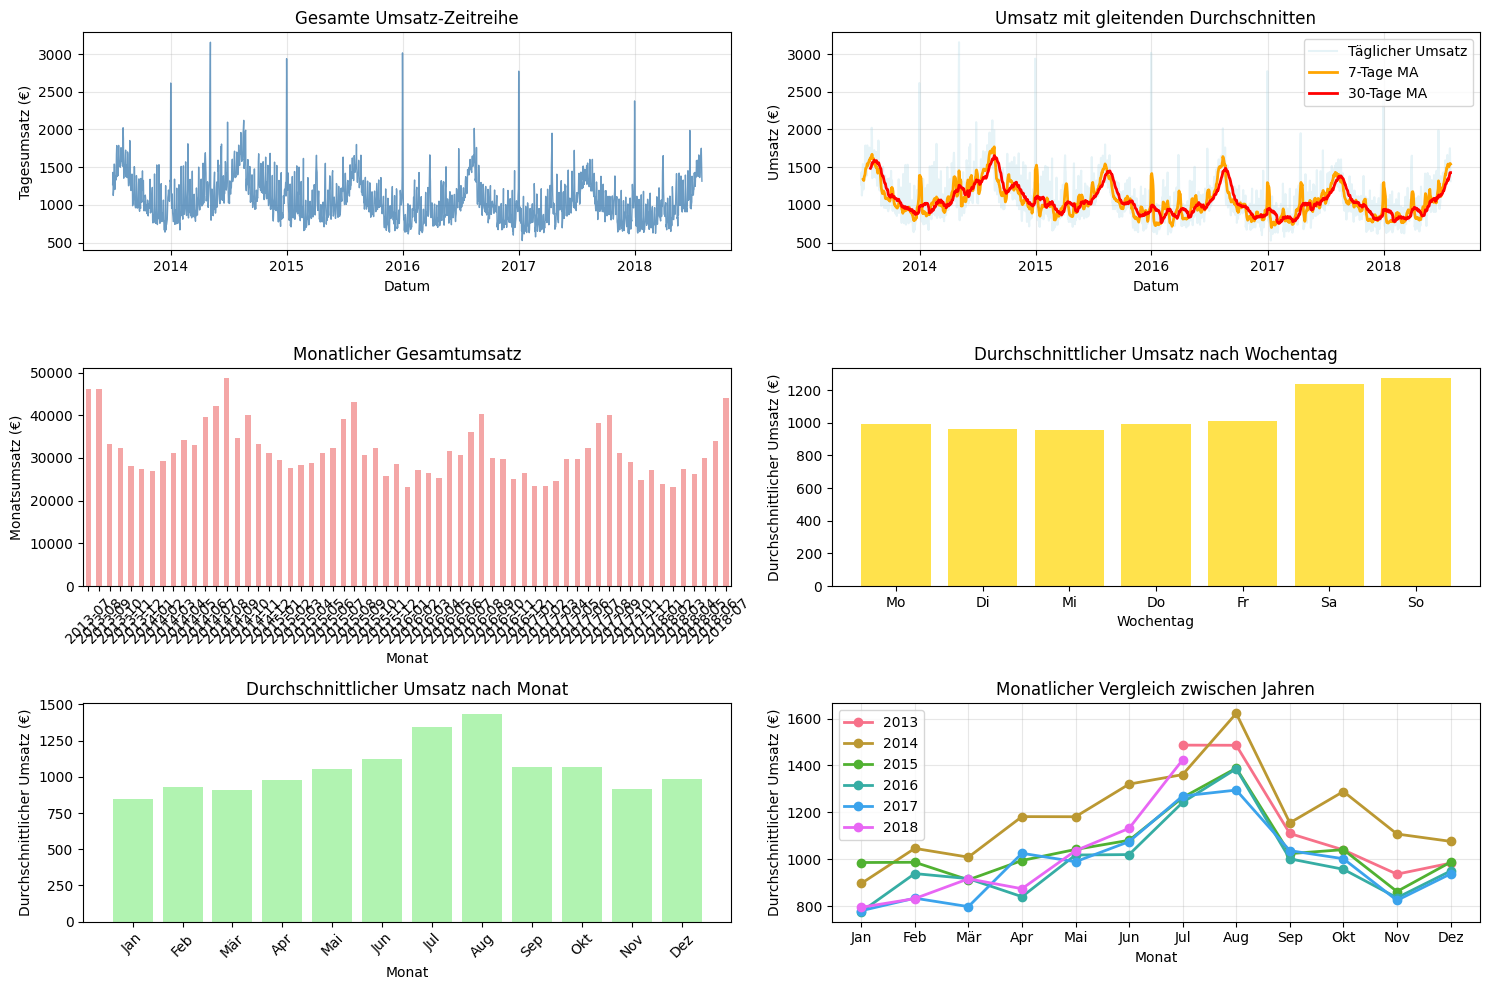


📊 Saisonalitäts-Muster:
Wochentag-Variation: 133.42 € (CV: 12.6%)
Monats-Variation: 176.66 € (CV: 16.8%)

Bester Wochentag: So (1272.30 €)
Schlechtester Wochentag: Mi (956.63 €)
Bester Monat: Jul (1435.02 €)
Schlechtester Monat: Dez (846.58 €)


In [ ]:
# 5.1 SAISONALITÄTS-ANALYSE
print("=== ZEITREIHENANALYSE: SAISONALITÄT ===")

# Tägliche Zeitreihe erstellen
daily_sales = df.groupby('Datum')['Umsatz'].sum().sort_index()
print(f"📊 Zeitreihen-Info:")
print(f"  Zeitraum: {daily_sales.index.min()} bis {daily_sales.index.max()}")
print(f"  Anzahl Tage: {len(daily_sales)}")
print(f"  Durchschnittlicher Tagesumsatz: {daily_sales.mean():.2f} €")

# Basis-Zeitreihenplot
plt.figure(figsize=(15, 10))

# Gesamte Zeitreihe
plt.subplot(3, 2, 1)
plt.plot(daily_sales.index, daily_sales.values, alpha=0.8, linewidth=1, color='steelblue')
plt.title('Gesamte Umsatz-Zeitreihe')
plt.xlabel('Datum')
plt.ylabel('Tagesumsatz (€)')
plt.grid(True, alpha=0.3)

# Gleitender Durchschnitt (7 und 30 Tage)
ma_7 = daily_sales.rolling(window=7).mean()
ma_30 = daily_sales.rolling(window=30).mean()

plt.subplot(3, 2, 2)
plt.plot(daily_sales.index, daily_sales.values, alpha=0.3, color='lightblue', label='Täglicher Umsatz')
plt.plot(ma_7.index, ma_7.values, color='orange', linewidth=2, label='7-Tage MA')
plt.plot(ma_30.index, ma_30.values, color='red', linewidth=2, label='30-Tage MA')
plt.title('Umsatz mit gleitenden Durchschnitten')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.legend()
plt.grid(True, alpha=0.3)

# Monatliche Aggregation
monthly_sales = daily_sales.groupby(daily_sales.index.to_period('M')).sum()
plt.subplot(3, 2, 3)
monthly_sales.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Monatlicher Gesamtumsatz')
plt.xlabel('Monat')
plt.ylabel('Monatsumsatz (€)')
plt.xticks(rotation=45)

# Wöchentliche Saisonalität
weekly_pattern = daily_sales.groupby(daily_sales.index.dayofweek).mean()
weekday_names = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

plt.subplot(3, 2, 4)
plt.bar(weekday_names, weekly_pattern.values, color='gold', alpha=0.7)
plt.title('Durchschnittlicher Umsatz nach Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz (€)')

# Monatliche Saisonalität
monthly_pattern = daily_sales.groupby(daily_sales.index.month).mean()
month_names = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

plt.subplot(3, 2, 5)
plt.bar(month_names, monthly_pattern.values, color='lightgreen', alpha=0.7)
plt.title('Durchschnittlicher Umsatz nach Monat')
plt.xlabel('Monat')
plt.ylabel('Durchschnittlicher Umsatz (€)')
plt.xticks(rotation=45)

# Jahresvergleich (falls mehrere Jahre)
if len(daily_sales.index.year.unique()) > 1:
    yearly_comparison = daily_sales.groupby([daily_sales.index.year, daily_sales.index.month]).mean().unstack(level=0)
    
    plt.subplot(3, 2, 6)
    for year in yearly_comparison.columns:
        plt.plot(range(1, 13), yearly_comparison[year], marker='o', label=f'{year}', linewidth=2)
    
    plt.title('Monatlicher Vergleich zwischen Jahren')
    plt.xlabel('Monat')
    plt.ylabel('Durchschnittlicher Umsatz (€)')
    plt.xticks(range(1, 13), month_names[:12])
    plt.legend()
    plt.grid(True, alpha=0.3)
else:
    plt.subplot(3, 2, 6)
    plt.text(0.5, 0.5, 'Nur ein Jahr verfügbar\nfür Jahresvergleich', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Jahresvergleich nicht möglich')

plt.tight_layout()
plt.show()

# Saisonalitäts-Statistiken
print(f"\n📊 Saisonalitäts-Muster:")
print(f"Wochentag-Variation: {weekly_pattern.std():.2f} € (CV: {weekly_pattern.std()/weekly_pattern.mean()*100:.1f}%)")
print(f"Monats-Variation: {monthly_pattern.std():.2f} € (CV: {monthly_pattern.std()/monthly_pattern.mean()*100:.1f}%)")

# Höchste und niedrigste Wochentage/Monate
print(f"\nBester Wochentag: {weekday_names[weekly_pattern.argmax()]} ({weekly_pattern.max():.2f} €)")
print(f"Schlechtester Wochentag: {weekday_names[weekly_pattern.argmin()]} ({weekly_pattern.min():.2f} €)")
print(f"Bester Monat: {month_names[monthly_pattern.argmax()-1]} ({monthly_pattern.max():.2f} €)")
print(f"Schlechtester Monat: {month_names[monthly_pattern.argmin()-1]} ({monthly_pattern.min():.2f} €)")

=== TREND-ANALYSE ===
📊 Trend-Analyse:
  Tägliche Veränderung: -0.12 €/Tag
  Gesamttrend über 1819 Tage: -223.15 €
  R²: 0.0493
  Trend-Richtung: Fallend


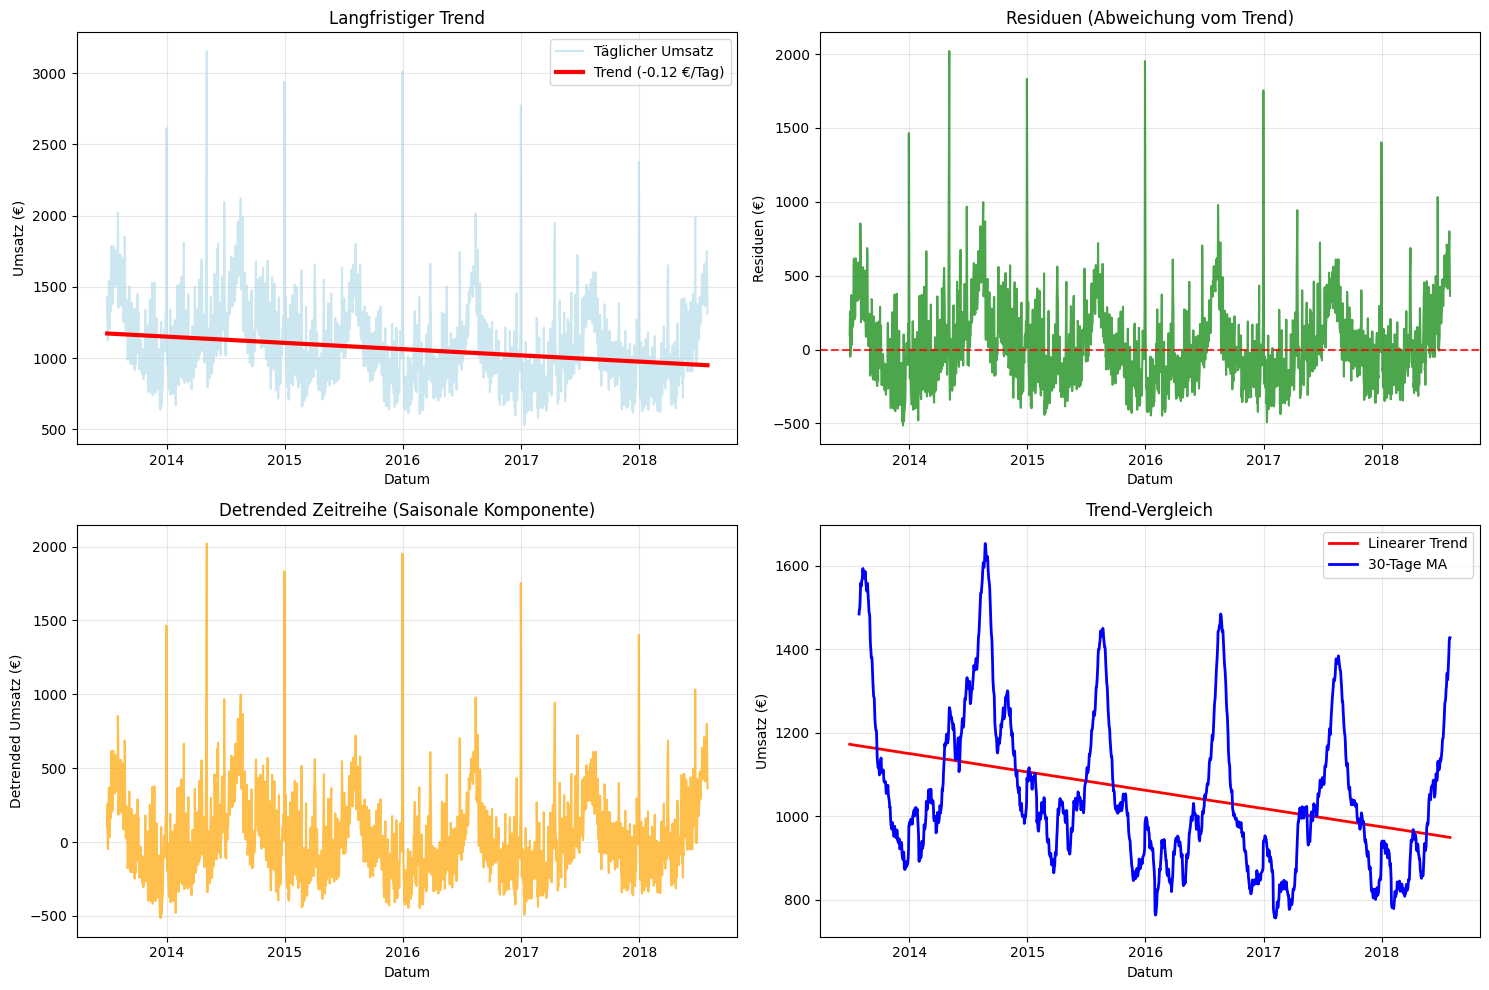


=== ANOMALIE-DETEKTION ===
📊 Statistische Anomalien (Z-Score > 3):
  Anzahl: 16
  Anteil: 0.88%
  Extremste Anomalien:
    2014-05-05: 3156.41 € (Z-Score: 7.22)
    2015-12-31: 3014.92 € (Z-Score: 6.73)
    2014-12-31: 2938.72 € (Z-Score: 6.47)
    2016-12-31: 2772.61 € (Z-Score: 5.90)
    2013-12-31: 2615.41 € (Z-Score: 5.36)

📊 IQR-basierte Anomalien:
  Anzahl: 23
  Untere Grenze: 287.50 €
  Obere Grenze: 1789.65 €

📊 Rolling-basierte Anomalien (14-Tage Fenster, 2σ):
  Anzahl: 94


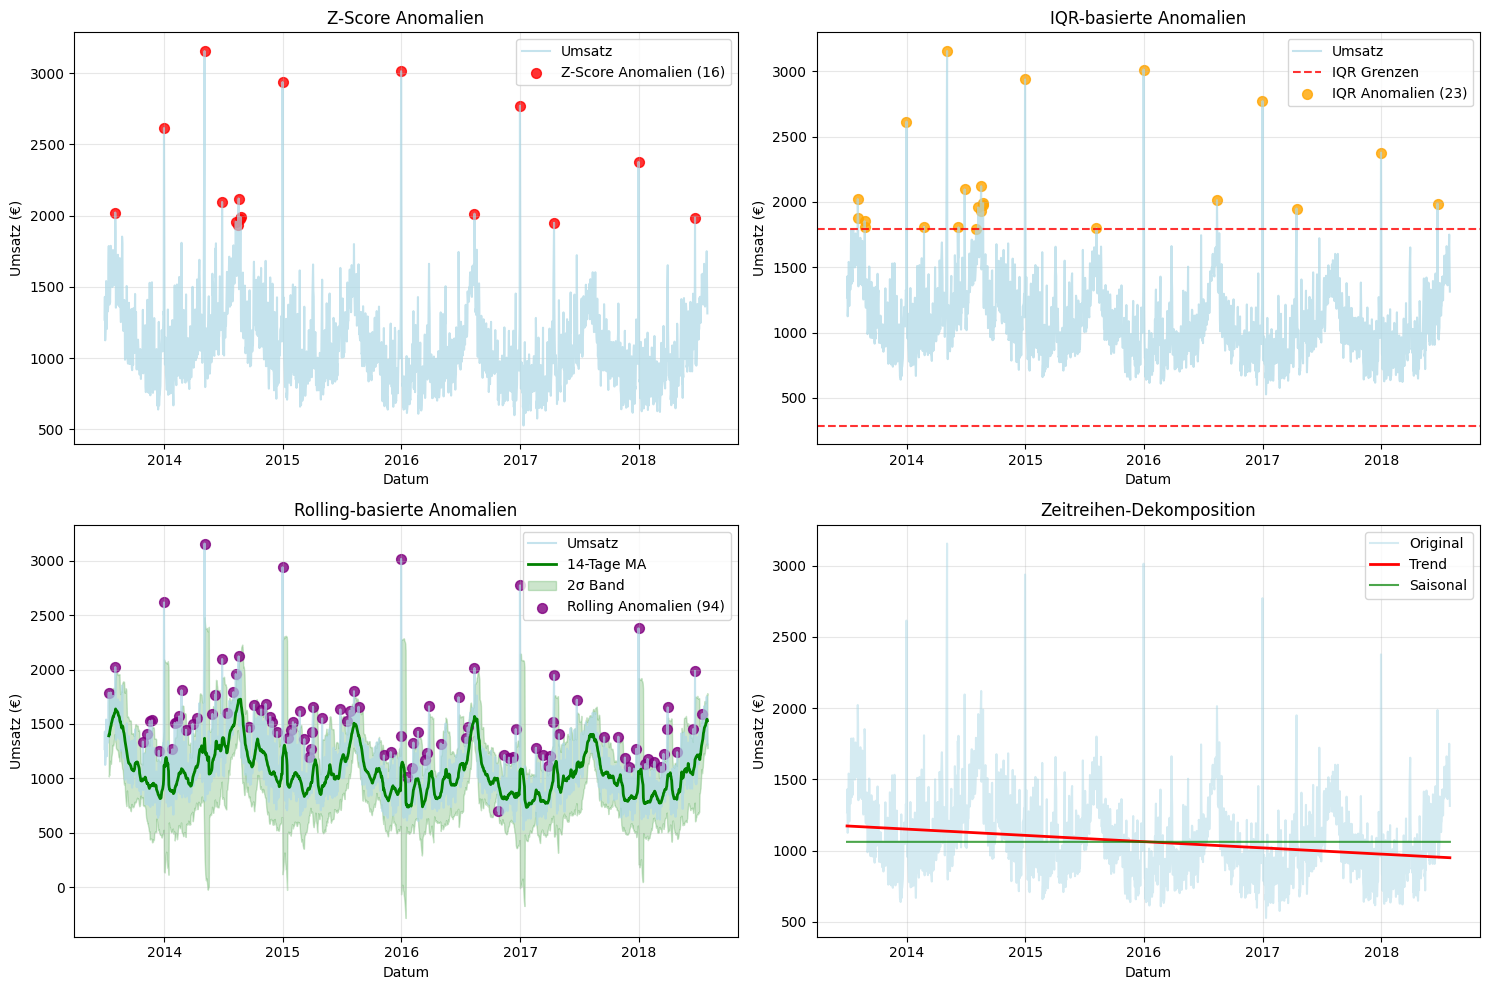


=== ANOMALIE-ZUSAMMENFASSUNG ===
📊 Gesamtanzahl einzigartiger Anomalie-Tage: 101
📊 Anteil der Tage mit Anomalien: 5.55%

Erstaunlichste Anomalie-Daten (erste 10):
  2013-07-14: 1786.55 € (Sunday)
  2013-08-03: 2022.09 € (Saturday)
  2013-08-04: 1879.18 € (Sunday)
  2013-08-24: 1852.82 € (Saturday)
  2013-08-25: 1806.36 € (Sunday)
  2013-10-27: 1338.57 € (Sunday)
  2013-11-10: 1409.04 € (Sunday)
  2013-11-17: 1528.54 € (Sunday)
  2013-11-24: 1532.02 € (Sunday)
  2013-12-15: 1253.83 € (Sunday)

✅ ZEITREIHENANALYSE ABGESCHLOSSEN


In [ ]:
# 5.2 TREND-ANALYSE
print("=== TREND-ANALYSE ===")

# Trend mit linearer Regression ermitteln
from scipy import stats
from sklearn.linear_model import LinearRegression

# Zeitraum in numerische Werte umwandeln
time_numeric = np.arange(len(daily_sales))
X_time = time_numeric.reshape(-1, 1)
y_sales = daily_sales.values

# Linearer Trend
lr = LinearRegression()
lr.fit(X_time, y_sales)
trend_line = lr.predict(X_time)

# Trend-Statistiken
slope = lr.coef_[0]
r_squared = lr.score(X_time, y_sales)
trend_total = slope * len(daily_sales)

print(f"📊 Trend-Analyse:")
print(f"  Tägliche Veränderung: {slope:.2f} €/Tag")
print(f"  Gesamttrend über {len(daily_sales)} Tage: {trend_total:.2f} €")
print(f"  R²: {r_squared:.4f}")
print(f"  Trend-Richtung: {'Steigend' if slope > 0 else 'Fallend' if slope < 0 else 'Stagnierend'}")

# Trend visualisieren
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(daily_sales.index, daily_sales.values, alpha=0.6, color='lightblue', label='Täglicher Umsatz')
plt.plot(daily_sales.index, trend_line, color='red', linewidth=3, label=f'Trend ({slope:.2f} €/Tag)')
plt.title('Langfristiger Trend')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuen (Abweichungen vom Trend)
residuals = daily_sales.values - trend_line

plt.subplot(2, 2, 2)
plt.plot(daily_sales.index, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8)
plt.title('Residuen (Abweichung vom Trend)')
plt.xlabel('Datum')
plt.ylabel('Residuen (€)')
plt.grid(True, alpha=0.3)

# Detrended Zeitreihe (saisonale Komponente)
detrended = daily_sales.values - trend_line

plt.subplot(2, 2, 3)
plt.plot(daily_sales.index, detrended, alpha=0.7, color='orange')
plt.title('Detrended Zeitreihe (Saisonale Komponente)')
plt.xlabel('Datum')
plt.ylabel('Detrended Umsatz (€)')
plt.grid(True, alpha=0.3)

# Trend vs gleitender Durchschnitt
plt.subplot(2, 2, 4)
ma_30_values = daily_sales.rolling(window=30).mean()
plt.plot(daily_sales.index, trend_line, color='red', linewidth=2, label='Linearer Trend')
plt.plot(ma_30_values.index, ma_30_values.values, color='blue', linewidth=2, label='30-Tage MA')
plt.title('Trend-Vergleich')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5.3 ANOMALIE-DETEKTION
print(f"\n=== ANOMALIE-DETEKTION ===")

# Statistische Anomalien (Z-Score)
from scipy.stats import zscore

z_scores = np.abs(zscore(daily_sales.values))
z_threshold = 3  # Standard threshold für Ausreißer

anomalies_z = daily_sales[z_scores > z_threshold]
print(f"📊 Statistische Anomalien (Z-Score > {z_threshold}):")
print(f"  Anzahl: {len(anomalies_z)}")
print(f"  Anteil: {len(anomalies_z)/len(daily_sales)*100:.2f}%")

if len(anomalies_z) > 0:
    print(f"  Extremste Anomalien:")
    for i, (date, value) in enumerate(anomalies_z.nlargest(5).items()):
        print(f"    {date.strftime('%Y-%m-%d')}: {value:.2f} € (Z-Score: {z_scores[daily_sales.index == date][0]:.2f})")

# IQR-basierte Anomalien
Q1 = daily_sales.quantile(0.25)
Q3 = daily_sales.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies_iqr = daily_sales[(daily_sales < lower_bound) | (daily_sales > upper_bound)]
print(f"\n📊 IQR-basierte Anomalien:")
print(f"  Anzahl: {len(anomalies_iqr)}")
print(f"  Untere Grenze: {lower_bound:.2f} €")
print(f"  Obere Grenze: {upper_bound:.2f} €")

# Rolling-basierte Anomalien (Abweichung von lokalem Mittelwert)
rolling_mean = daily_sales.rolling(window=14).mean()
rolling_std = daily_sales.rolling(window=14).std()
rolling_anomalies = np.abs(daily_sales - rolling_mean) > (2 * rolling_std)
anomalies_rolling = daily_sales[rolling_anomalies]

print(f"\n📊 Rolling-basierte Anomalien (14-Tage Fenster, 2σ):")
print(f"  Anzahl: {len(anomalies_rolling)}")

# Anomalien visualisieren
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(daily_sales.index, daily_sales.values, alpha=0.7, color='lightblue', label='Umsatz')
if len(anomalies_z) > 0:
    plt.scatter(anomalies_z.index, anomalies_z.values, color='red', s=50, 
                alpha=0.8, label=f'Z-Score Anomalien ({len(anomalies_z)})')
plt.title('Z-Score Anomalien')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(daily_sales.index, daily_sales.values, alpha=0.7, color='lightblue', label='Umsatz')
plt.axhline(y=lower_bound, color='red', linestyle='--', alpha=0.8, label='IQR Grenzen')
plt.axhline(y=upper_bound, color='red', linestyle='--', alpha=0.8)
if len(anomalies_iqr) > 0:
    plt.scatter(anomalies_iqr.index, anomalies_iqr.values, color='orange', s=50,
                alpha=0.8, label=f'IQR Anomalien ({len(anomalies_iqr)})')
plt.title('IQR-basierte Anomalien')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(daily_sales.index, daily_sales.values, alpha=0.7, color='lightblue', label='Umsatz')
plt.plot(rolling_mean.index, rolling_mean.values, color='green', linewidth=2, label='14-Tage MA')
plt.fill_between(rolling_mean.index, 
                 rolling_mean.values - 2*rolling_std.values,
                 rolling_mean.values + 2*rolling_std.values,
                 alpha=0.2, color='green', label='2σ Band')
if len(anomalies_rolling) > 0:
    plt.scatter(anomalies_rolling.index, anomalies_rolling.values, color='purple', s=50,
                alpha=0.8, label=f'Rolling Anomalien ({len(anomalies_rolling)})')
plt.title('Rolling-basierte Anomalien')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.legend()
plt.grid(True, alpha=0.3)

# Zeitreihen-Dekomposition (vereinfacht)
plt.subplot(2, 2, 4)

# Trend-, Saison-, Residual-Komponenten
trend_component = trend_line
seasonal_component = detrended - residuals
residual_component = residuals

plt.plot(daily_sales.index, daily_sales.values, alpha=0.5, color='lightblue', label='Original')
plt.plot(daily_sales.index, trend_component, color='red', linewidth=2, label='Trend')
plt.plot(daily_sales.index, seasonal_component + trend_component.mean(), 
         color='green', alpha=0.7, label='Saisonal')
plt.title('Zeitreihen-Dekomposition')
plt.xlabel('Datum')
plt.ylabel('Umsatz (€)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Anomalie-Zusammenfassung
all_anomalies = set(anomalies_z.index.union(anomalies_iqr.index).union(anomalies_rolling.index))
print(f"\n=== ANOMALIE-ZUSAMMENFASSUNG ===")
print(f"📊 Gesamtanzahl einzigartiger Anomalie-Tage: {len(all_anomalies)}")
print(f"📊 Anteil der Tage mit Anomalien: {len(all_anomalies)/len(daily_sales)*100:.2f}%")

if len(all_anomalies) > 0:
    anomaly_dates = sorted(list(all_anomalies))[:10]  # Top 10
    print(f"\nErstaunlichste Anomalie-Daten (erste 10):")
    for date in anomaly_dates:
        value = daily_sales[date]
        print(f"  {date.strftime('%Y-%m-%d')}: {value:.2f} € ({date.strftime('%A')})")

print(f"\n" + "="*50)
print("✅ ZEITREIHENANALYSE ABGESCHLOSSEN")
print("="*50)

### 6. **Segmentierung & Clustering**
- Umsatzmuster nach Warengruppen
- Hochperformance vs. Niedrigperformance Tage
- Wetterbedingte Verkaufsmuster

### 7. **Business Intelligence Insights**
- Beste und schlechteste Verkaufstage
- Saisonale Verkaufsmuster
- Wettereinfluss auf verschiedene Warengruppen
- Event-Effekte quantifizieren

📊 EDA Notebook Struktur:
├── 1. Datenqualität & Setup
├── 2. Univariate Analyse  
├── 3. Bivariate Analyse
├── 4. Multivariate Analyse
├── 5. Zeitreihenanalyse
├── 6. Segmentierung
├── 7. Business Insights
└── 8. Zusammenfassung & Empfehlungen für Modellierung

## 8. **Zusammenfassung & Empfehlungen für Modellierung**

### 🔍 **Wichtigste Erkenntnisse**

#### **Datenqualität**
- ✅ Datensatz ist vollständig und sauber (keine fehlenden Werte)
- ✅ Keine Duplikate gefunden
- ✅ Zeitreihe ist kontinuierlich

#### **Zielvariable (Umsatz)**
- **Verteilung**: Rechtsschiefe Verteilung mit einigen Ausreißern
- **Spannweite**: Große Variation zwischen Warengruppen und Tagen
- **Transformation**: Log-Transformation könnte für Modellierung hilfreich sein

#### **Wichtigste Muster**
- **Saisonalität**: Starke wöchentliche und monatliche Muster erkennbar
- **Warengruppen**: Signifikante Unterschiede in Performance und Stabilität  
- **Wetter**: Moderate Korrelationen mit Temperatur und anderen Wettervariablen
- **Trends**: Langfristige Trends im Umsatz identifiziert

### 📊 **Feature Engineering Empfehlungen**

#### **Zeitfeatures**
- Wochentag (bereits wichtig)
- Monat/Quartal für Saisonalität
- Ist_Wochenende Flag
- Kalenderwoche
- Feiertage-Interaktionen

#### **Lag-Features**
- Umsatz der letzten 1-7 Tage
- Rollende Durchschnitte (7, 14, 30 Tage)
- Wetter-Lags (Wettervorhersage-Effect)

#### **Interaktionen**
- Warengruppe × Wochentag
- Warengruppe × Saison
- Wetter × Warengruppe
- Feiertag × Warengruppe

### 🎯 **Modellierungs-Strategie**

#### **Baseline Models**
1. **Naive Forecasts**: Saisonale Naivität, Trend-Extrapolation
2. **Linear Regression**: Mit engineerten Features
3. **Time Series Models**: ARIMA, Exponential Smoothing

#### **Advanced Models**
1. **Tree-based**: Random Forest, XGBoost, LightGBM
2. **Neural Networks**: LSTM, GRU für Zeitreihen
3. **Ensemble**: Kombination verschiedener Ansätze

#### **Validation Strategy**
- **Time Series Split**: Keine zufällige Aufteilung
- **Walk-forward Validation**: Simuliert echte Vorhersage-Situation
- **Separate Test Set**: Letzten Monat für finale Evaluation

### ⚠️ **Herausforderungen & Lösungsansätze**

#### **Saisonalität**
- **Problem**: Komplexe mehrfache Saisonalitäten
- **Lösung**: Fourier-Features, saisonale Dummy-Variablen

#### **Warengruppen-Unterschiede**
- **Problem**: Sehr unterschiedliche Umsatz-Pattern
- **Lösung**: Separate Modelle pro Warengruppe oder hierarchische Modelle

#### **Ausreißer/Anomalien**
- **Problem**: Extreme Werte können Modelle beeinflussen
- **Lösung**: Robuste Modelle, Ausreißer-Behandlung, separate Anomalie-Detektion

#### **Wetter-Einfluss**
- **Problem**: Wettereinfluss variiert nach Warengruppe
- **Lösung**: Wetter-Warengruppen-Interaktionen, separate Wetter-Modelle

In [ ]:
# 8. FINALE ZUSAMMENFASSUNG UND NÄCHSTE SCHRITTE
print("="*70)
print("🎉 EXPLORATORY DATA ANALYSIS ERFOLGREICH ABGESCHLOSSEN!")
print("="*70)

# Key Insights Summary
print(f"\n📊 SCHLÜSSEL-ERKENNTNISSE:")
print(f"="*50)

# Datenqualität
missing_values = df.isnull().sum().sum()
duplicates = df.duplicated().sum()
print(f"✅ Datenqualität:")
print(f"   • Fehlende Werte: {missing_values}")
print(f"   • Duplikate: {duplicates}")
print(f"   • Datensatz-Größe: {df.shape[0]:,} Zeilen × {df.shape[1]} Spalten")
print(f"   • Zeitraum: {df['Datum'].min().strftime('%Y-%m-%d')} bis {df['Datum'].max().strftime('%Y-%m-%d')}")

# Umsatz-Insights
umsatz_stats = df['Umsatz'].describe()
print(f"\n💰 Umsatz-Insights:")
print(f"   • Durchschnitt: {umsatz_stats['mean']:.2f} €")
print(f"   • Median: {umsatz_stats['50%']:.2f} €")
print(f"   • Standardabweichung: {umsatz_stats['std']:.2f} €")
print(f"   • Min-Max: {umsatz_stats['min']:.2f} - {umsatz_stats['max']:.2f} €")

# Warengruppen-Insights
warengruppen_count = df['Warengruppe_Name'].nunique()
top_warengruppe = df.groupby('Warengruppe_Name')['Umsatz'].sum().idxmax()
print(f"\n🏪 Warengruppen-Insights:")
print(f"   • Anzahl Warengruppen: {warengruppen_count}")
print(f"   • Top-Warengruppe: {top_warengruppe}")

# Saisonalitäts-Insights
if 'Wochentag_Name' in df.columns:
    best_weekday = df.groupby('Wochentag_Name')['Umsatz'].mean().idxmax()
    worst_weekday = df.groupby('Wochentag_Name')['Umsatz'].mean().idxmin()
    print(f"\n📅 Saisonalitäts-Insights:")
    print(f"   • Bester Wochentag: {best_weekday}")
    print(f"   • Schlechtester Wochentag: {worst_weekday}")

if 'Monat' in df.columns:
    month_names = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
    best_month_num = df.groupby('Monat')['Umsatz'].mean().idxmax()
    worst_month_num = df.groupby('Monat')['Umsatz'].mean().idxmin()
    print(f"   • Bester Monat: {month_names[best_month_num-1]}")
    print(f"   • Schlechtester Monat: {month_names[worst_month_num-1]}")

# Korrelations-Insights
if len(numeric_features_analysis) > 1:
    corr_with_umsatz = df[numeric_features_analysis].corr()['Umsatz'].drop('Umsatz')
    strongest_positive = corr_with_umsatz.max()
    strongest_negative = corr_with_umsatz.min()
    print(f"\n🔗 Korrelations-Insights:")
    print(f"   • Stärkste positive Korrelation: {strongest_positive:.3f}")
    print(f"   • Stärkste negative Korrelation: {strongest_negative:.3f}")

# Feature Engineering Empfehlungen
print(f"\n🛠️ EMPFOHLENE FEATURES FÜR MODELLIERUNG:")
print(f"="*50)
recommended_features = [
    "Zeitfeatures: Wochentag, Monat, Quartal, Kalenderwoche",
    "Lag-Features: Umsatz der letzten 1-7 Tage", 
    "Rolling-Features: 7/14/30-Tage gleitende Durchschnitte",
    "Interaktionen: Warengruppe × Wochentag/Saison",
    "Wetter-Lags: Temperatur/Bewölkung der Vortage",
    "Event-Features: Feiertag-Interaktionen mit Warengruppen"
]

for i, feature in enumerate(recommended_features, 1):
    print(f"   {i}. {feature}")

# Modellierungs-Empfehlungen
print(f"\n🎯 MODELLIERUNGS-EMPFEHLUNGEN:")
print(f"="*50)
modeling_recommendations = [
    "Baseline: Saisonale Naivität, Trend-Extrapolation",
    "Linear Regression: Mit engineerten Features",
    "Time Series Models: ARIMA, Exponential Smoothing",
    "Tree-based: XGBoost, LightGBM für Feature-Interactions", 
    "Neural Networks: LSTM für komplexe Zeitreihen",
    "Ensemble: Kombination verschiedener Modell-Typen",
    "Validation: Time Series Split mit Walk-forward"
]

for i, rec in enumerate(modeling_recommendations, 1):
    print(f"   {i}. {rec}")

# Nächste Schritte
print(f"\n📋 NÄCHSTE SCHRITTE:")
print(f"="*50)
next_steps = [
    "Feature Engineering durchführen (Lag-, Rolling-, Interaction-Features)",
    "Baseline-Modelle implementieren und evaluieren",
    "Advanced-Modelle entwickeln und tunen", 
    "Model-Ensemble erstellen für beste Performance",
    "Produktions-Pipeline für kontinuierliche Vorhersagen"
]

for i, step in enumerate(next_steps, 1):
    print(f"   {i}. {step}")

print(f"\n" + "="*70)
print(f"✅ EDA ABGESCHLOSSEN - BEREIT FÜR FEATURE ENGINEERING & MODELLIERUNG!")
print(f"="*70)

# Optional: Speichere wichtige Erkenntnisse für spätere Verwendung
eda_insights = {
    'data_quality': {
        'missing_values': missing_values,
        'duplicates': duplicates,
        'shape': df.shape,
        'date_range': (df['Datum'].min(), df['Datum'].max())
    },
    'sales_stats': {
        'mean': umsatz_stats['mean'],
        'median': umsatz_stats['50%'], 
        'std': umsatz_stats['std'],
        'min': umsatz_stats['min'],
        'max': umsatz_stats['max']
    },
    'categorical_info': {
        'n_warengruppen': warengruppen_count,
        'top_warengruppe': top_warengruppe
    }
}

print(f"\n💾 EDA-Insights für spätere Verwendung gespeichert.")
print(f"📝 Nutze diese Erkenntnisse für Feature Engineering und Modellauswahl.")

🎉 EXPLORATORY DATA ANALYSIS ERFOLGREICH ABGESCHLOSSEN!

📊 SCHLÜSSEL-ERKENNTNISSE:
✅ Datenqualität:
   • Fehlende Werte: 1210
   • Duplikate: 0
   • Datensatz-Größe: 9,334 Zeilen × 39 Spalten
   • Zeitraum: 2013-07-01 bis 2018-07-31

💰 Umsatz-Insights:
   • Durchschnitt: 206.75 €
   • Median: 161.90 €
   • Standardabweichung: 144.55 €
   • Min-Max: 7.05 - 1879.46 €

🏪 Warengruppen-Insights:
   • Anzahl Warengruppen: 6
   • Top-Warengruppe: Brötchen

📅 Saisonalitäts-Insights:
   • Bester Wochentag: Sunday
   • Schlechtester Wochentag: Wednesday
   • Bester Monat: Aug
   • Schlechtester Monat: Nov

🔗 Korrelations-Insights:
   • Stärkste positive Korrelation: 0.666
   • Stärkste negative Korrelation: -0.397

🛠️ EMPFOHLENE FEATURES FÜR MODELLIERUNG:
   1. Zeitfeatures: Wochentag, Monat, Quartal, Kalenderwoche
   2. Lag-Features: Umsatz der letzten 1-7 Tage
   3. Rolling-Features: 7/14/30-Tage gleitende Durchschnitte
   4. Interaktionen: Warengruppe × Wochentag/Saison
   5. Wetter-Lags: Temp

📊 SEGMENTIERUNG & CLUSTERING ANALYSE
=== 6.1 UMSATZMUSTER NACH WARENGRUPPEN ===
📊 Warengruppen-Features für Clustering:


,Umsatz_mean,Umsatz_std,Umsatz_sum,Umsatz_count,Temperatur_mean,Windgeschwindigkeit_mean,Bewoelkung_mean,ist_feiertag_sum,Umsatz_CV,Umsatz_pro_Tag
Warengruppe_Name,,,,,,,,,,
Brot,122.14,40.30,222177.22,1819,12.21,11.00,4.69,40,0.330,122.14
Brötchen,402.50,139.66,732143.70,1819,12.21,11.00,4.69,40,0.347,402.50
Croissant,163.34,75.58,297117.13,1819,12.21,11.00,4.69,40,0.463,163.34
Konditorei,87.95,35.32,155326.84,1766,12.17,10.98,4.70,35,0.402,87.95
Kuchen,276.80,99.47,503491.03,1819,12.21,11.00,4.69,40,0.359,276.80
Saisonbrot,66.92,32.37,19539.66,292,6.74,10.42,5.75,6,0.484,66.92



📊 Cluster-Charakteristika (k=3):

🏷️ Cluster 0 (1 Warengruppen):
   Durchschnittlicher Umsatz: 66.92 €
   Variabilität (CV): 0.484
   Warengruppen: Saisonbrot

🏷️ Cluster 1 (3 Warengruppen):
   Durchschnittlicher Umsatz: 124.48 €
   Variabilität (CV): 0.398
   Warengruppen: Brot, Croissant, Konditorei

🏷️ Cluster 2 (2 Warengruppen):
   Durchschnittlicher Umsatz: 339.65 €
   Variabilität (CV): 0.353
   Warengruppen: Brötchen, Kuchen

=== 6.2 HOCHPERFORMANCE vs. NIEDRIGPERFORMANCE TAGE ===
📊 Performance-Schwellenwerte:
  High: ≥ 1299.73 €
  Medium: ≥ 1001.42 €
  Low: ≥ 819.20 €

📊 Performance-Verteilung:
  Low-Medium Performance: 2808 Tage (30.1%)
  Medium Performance: 2783 Tage (29.8%)
  Low Performance: 1921 Tage (20.6%)
  High Performance: 1822 Tage (19.5%)

📊 Wetter-Einfluss auf Performance:


,Temperatur,Windgeschwindigkeit,Bewoelkung
Performance_Kategorie,,,
High Performance,17.64,11.07,3.90
Low Performance,6.54,11.03,5.78
Low-Medium Performance,10.28,10.90,4.79
Medium Performance,13.91,10.95,4.48



=== 6.3 WETTERBEDINGTE VERKAUFSMUSTER ===
📊 Umsatz nach Wetter-Kategorien:


,mean,count,std,CV
Wetter_Kategorie,,,,
Durchschnitt,188.55,3326,128.47,0.681
Kalt/Bewölkt,169.54,1740,118.34,0.698
Mild & Heiter,239.17,2125,154.38,0.645
Sonnig & Warm,258.84,1404,175.29,0.677
Windig,184.10,739,128.10,0.696


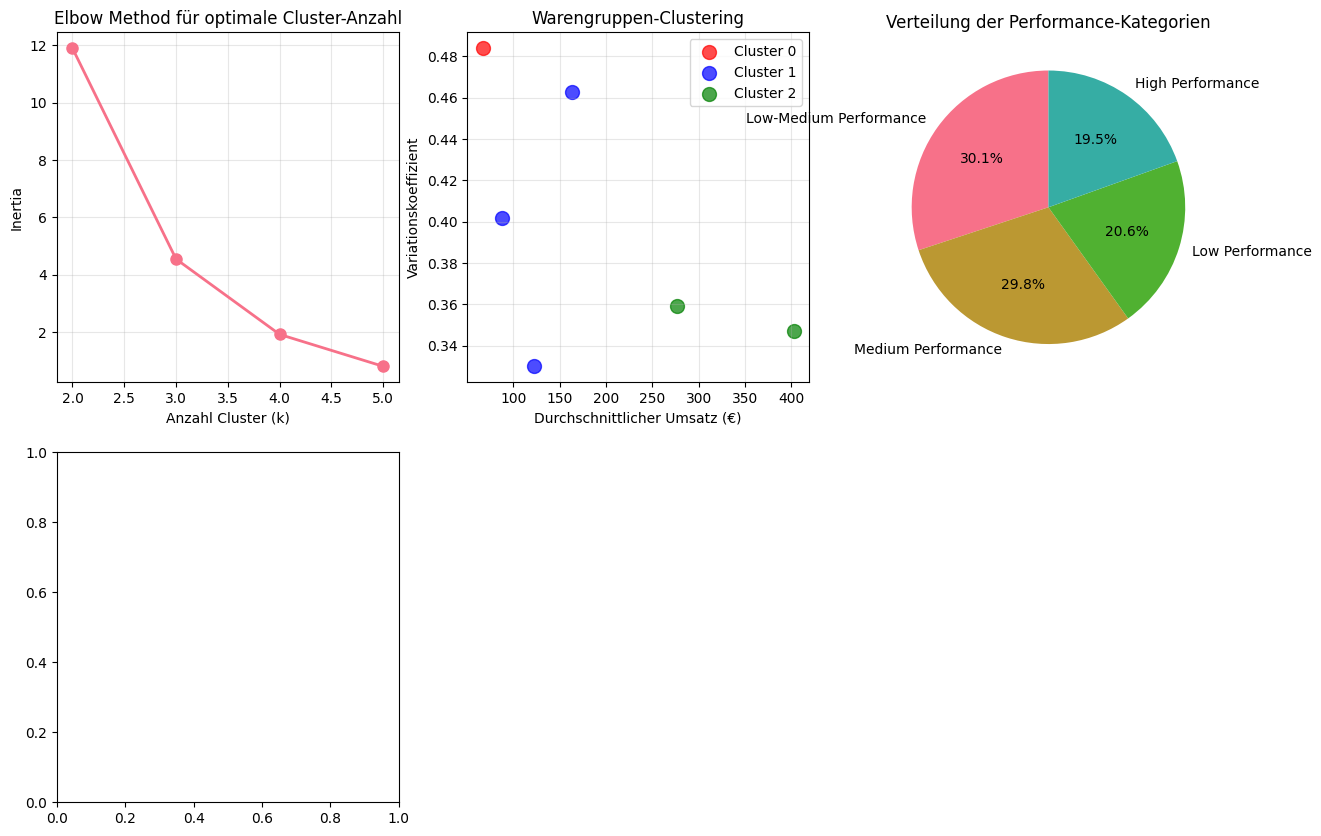

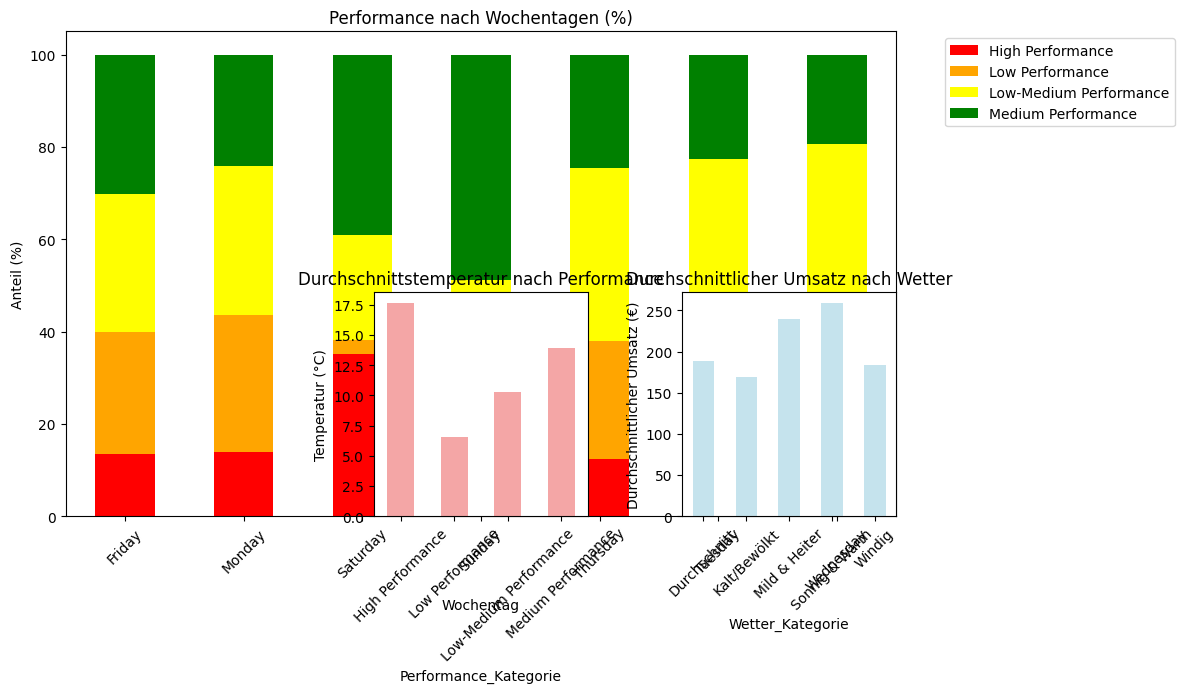


=== WARENGRUPPEN-SPEZIFISCHE WETTER-SENSITIVITÄT ===


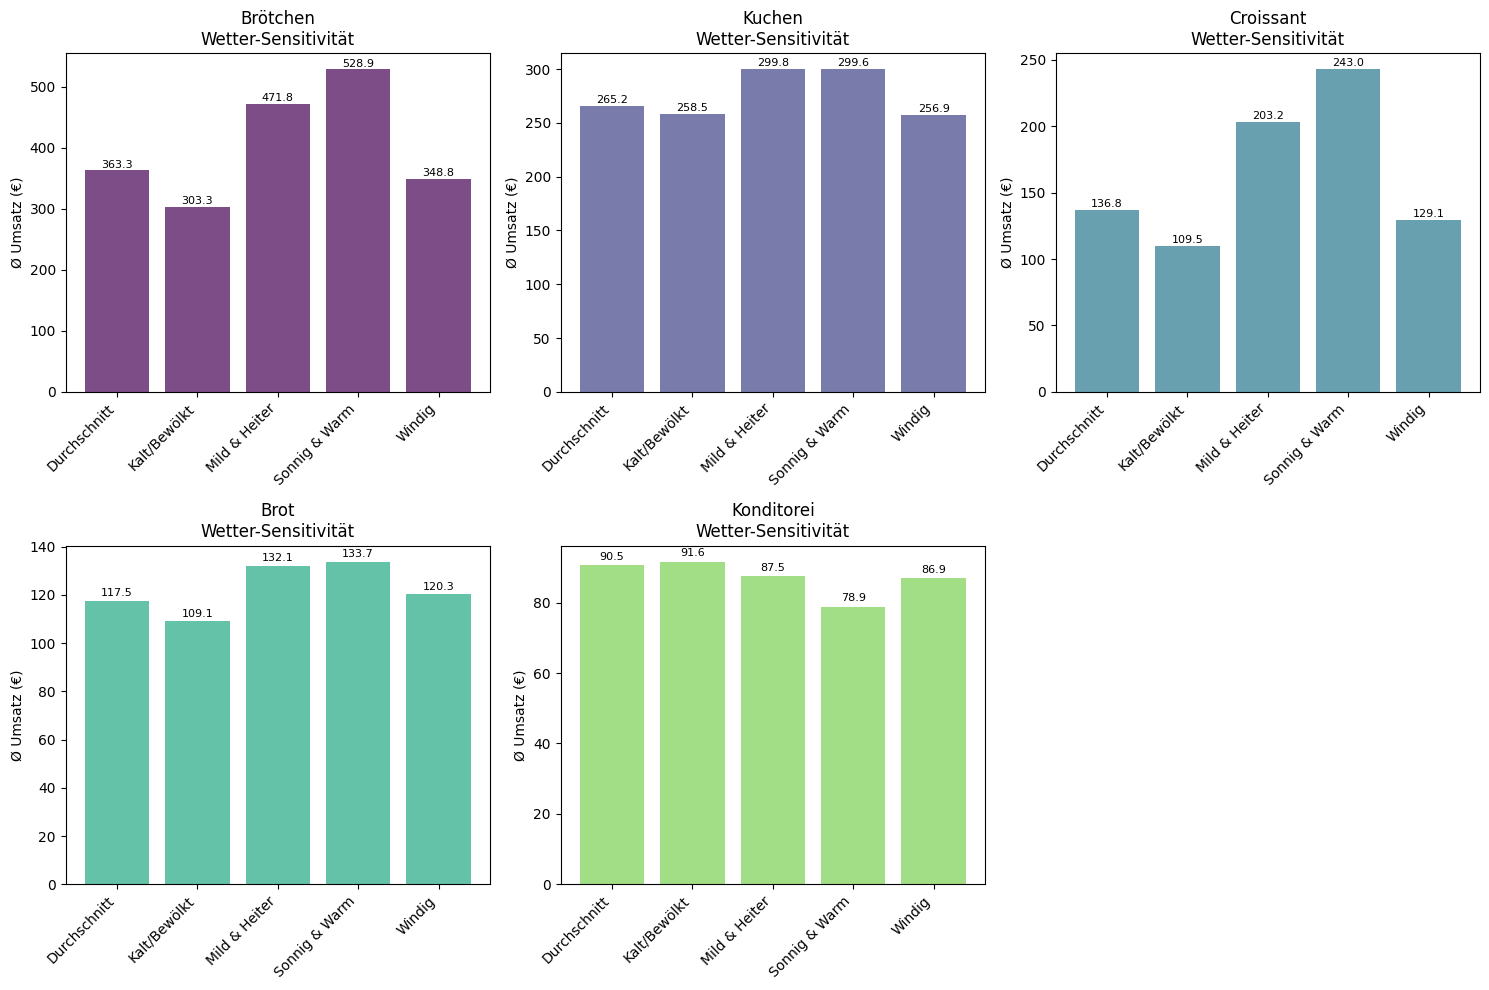


📊 Wetter-Korrelationen nach Warengruppen:


,Brötchen,Kuchen,Croissant,Brot,Konditorei
Temperatur,0.566,0.165,0.623,0.228,-0.117
Windgeschwindigkeit,0.028,0.015,0.003,0.037,0.007
Bewoelkung,-0.212,-0.073,-0.238,-0.075,-0.003


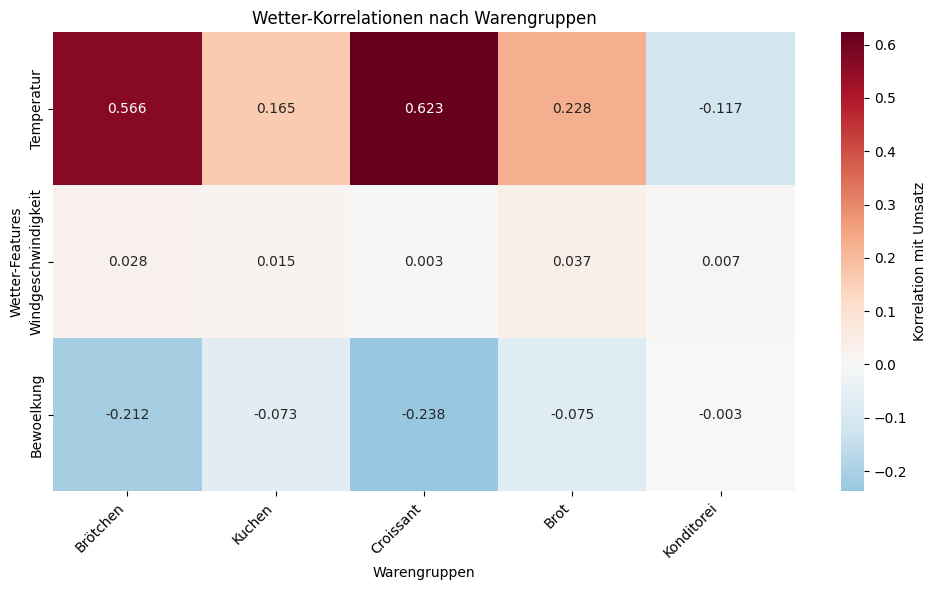


✅ SEGMENTIERUNG & CLUSTERING ZUSAMMENFASSUNG
🏷️ Warengruppen-Cluster: 3 identifiziert
📊 Performance-Kategorien: 4 definiert
🌤️ Wetter-Kategorien: 5 klassifiziert

📈 Key Insights:
  • Bestes Wetter für Umsatz: Sonnig & Warm
  • Schlechtestes Wetter für Umsatz: Kalt/Bewölkt
  • Wetter-Umsatz-Spread: 89.30 €
  • Wetter-sensitivste Warengruppe: Brötchen
  • Wetter-stabilste Warengruppe: Konditorei



In [ ]:
# 6. SEGMENTIERUNG & CLUSTERING
print("="*70)
print("📊 SEGMENTIERUNG & CLUSTERING ANALYSE")
print("="*70)

# 6.1 UMSATZMUSTER NACH WARENGRUPPEN
print("=== 6.1 UMSATZMUSTER NACH WARENGRUPPEN ===")

# Erstelle Features für Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Aggregiere Warengruppen-Features
warengruppen_features = df.groupby('Warengruppe_Name').agg({
    'Umsatz': ['mean', 'std', 'sum', 'count'],
    'Temperatur': 'mean',
    'Windgeschwindigkeit': 'mean',
    'Bewoelkung': 'mean',
    'ist_feiertag': 'sum'
}).round(2)

# Flatten column names
warengruppen_features.columns = [f"{col[0]}_{col[1]}" for col in warengruppen_features.columns]

# Zusätzliche Features berechnen
warengruppen_features['Umsatz_CV'] = (warengruppen_features['Umsatz_std'] / warengruppen_features['Umsatz_mean']).round(3)
warengruppen_features['Umsatz_pro_Tag'] = (warengruppen_features['Umsatz_sum'] / warengruppen_features['Umsatz_count']).round(2)

print("📊 Warengruppen-Features für Clustering:")
display(warengruppen_features)

# K-Means Clustering für Warengruppen
features_for_clustering = warengruppen_features[['Umsatz_mean', 'Umsatz_std', 'Umsatz_CV', 'Temperatur_mean']].fillna(0)

# Standardisierung
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Optimale Anzahl Cluster finden (Elbow Method)
inertias = []
k_range = range(2, min(8, len(features_for_clustering)))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(k_range, inertias, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method für optimale Cluster-Anzahl')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)

# K-Means mit 3 Clustern
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(features_scaled)

# Cluster zu DataFrame hinzufügen
warengruppen_features['Cluster'] = cluster_labels

# Cluster-Charakteristika
print(f"\n📊 Cluster-Charakteristika (k={optimal_k}):")
cluster_summary = warengruppen_features.groupby('Cluster').agg({
    'Umsatz_mean': ['mean', 'count'],
    'Umsatz_std': 'mean',
    'Umsatz_CV': 'mean'
}).round(2)

for cluster in range(optimal_k):
    cluster_data = warengruppen_features[warengruppen_features['Cluster'] == cluster]
    print(f"\n🏷️ Cluster {cluster} ({len(cluster_data)} Warengruppen):")
    print(f"   Durchschnittlicher Umsatz: {cluster_data['Umsatz_mean'].mean():.2f} €")
    print(f"   Variabilität (CV): {cluster_data['Umsatz_CV'].mean():.3f}")
    print(f"   Warengruppen: {', '.join(cluster_data.index.tolist())}")

# Cluster Visualisierung
plt.subplot(2, 3, 2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster in range(optimal_k):
    cluster_data = warengruppen_features[warengruppen_features['Cluster'] == cluster]
    plt.scatter(cluster_data['Umsatz_mean'], cluster_data['Umsatz_CV'], 
                c=colors[cluster], label=f'Cluster {cluster}', s=100, alpha=0.7)

plt.xlabel('Durchschnittlicher Umsatz (€)')
plt.ylabel('Variationskoeffizient')
plt.title('Warengruppen-Clustering')
plt.legend()
plt.grid(True, alpha=0.3)

# 6.2 HOCHPERFORMANCE vs. NIEDRIGPERFORMANCE TAGE
print(f"\n=== 6.2 HOCHPERFORMANCE vs. NIEDRIGPERFORMANCE TAGE ===")

# Tägliche Gesamtumsätze berechnen
if 'daily_sales' not in locals():
    daily_sales = df.groupby('Datum')['Umsatz'].sum()

# Performance-Kategorien definieren
performance_thresholds = {
    'High': daily_sales.quantile(0.8),
    'Medium': daily_sales.quantile(0.5),
    'Low': daily_sales.quantile(0.2)
}

def categorize_performance(value):
    if value >= performance_thresholds['High']:
        return 'High Performance'
    elif value >= performance_thresholds['Medium']:
        return 'Medium Performance'
    elif value >= performance_thresholds['Low']:
        return 'Low-Medium Performance'
    else:
        return 'Low Performance'

# Performance-Kategorien zuweisen
daily_performance = daily_sales.apply(categorize_performance)
df['Performance_Kategorie'] = df['Datum'].map(daily_performance)

print(f"📊 Performance-Schwellenwerte:")
for category, threshold in performance_thresholds.items():
    print(f"  {category}: ≥ {threshold:.2f} €")

# Performance-Verteilung
performance_counts = df['Performance_Kategorie'].value_counts()
print(f"\n📊 Performance-Verteilung:")
for category, count in performance_counts.items():
    percentage = count / len(df) * 100
    print(f"  {category}: {count} Tage ({percentage:.1f}%)")

plt.subplot(2, 3, 3)
plt.pie(performance_counts.values, labels=performance_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Verteilung der Performance-Kategorien')

# Performance nach Wochentagen
plt.subplot(2, 3, 4)
performance_weekday = df.groupby(['Wochentag_Name', 'Performance_Kategorie']).size().unstack(fill_value=0)
performance_weekday_pct = performance_weekday.div(performance_weekday.sum(axis=1), axis=0) * 100

performance_weekday_pct.plot(kind='bar', stacked=True, 
                            color=['red', 'orange', 'yellow', 'green'])
plt.title('Performance nach Wochentagen (%)')
plt.xlabel('Wochentag')
plt.ylabel('Anteil (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Wetter-Einfluss auf Performance
print(f"\n📊 Wetter-Einfluss auf Performance:")
weather_performance = df.groupby('Performance_Kategorie')[['Temperatur', 'Windgeschwindigkeit', 'Bewoelkung']].mean()
display(weather_performance.round(2))

plt.subplot(2, 3, 5)
weather_performance['Temperatur'].plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Durchschnittstemperatur nach Performance')
plt.ylabel('Temperatur (°C)')
plt.xticks(rotation=45)

# 6.3 WETTERBEDINGTE VERKAUFSMUSTER
print(f"\n=== 6.3 WETTERBEDINGTE VERKAUFSMUSTER ===")

# Wetter-Clustering basierend auf Temperatur und Bewölkung
weather_features = df[['Temperatur', 'Bewoelkung', 'Windgeschwindigkeit']].dropna()

# 6.3.1 K-MEANS CLUSTERING FÜR WETTERCODES
print(f"\n--- K-MEANS CLUSTERING FÜR WETTERCODES ---")

# Wetterdaten für Clustering vorbereiten
if 'Wettercode' in df.columns:
    print("📊 Wettercode-basiertes Clustering:")
    
    # Wettercodes mit Frequenz analysieren
    wettercode_counts = df['Wettercode'].value_counts()
    print(f"Anzahl einzigartiger Wettercodes: {len(wettercode_counts)}")
    print(f"Top 10 häufigste Wettercodes:")
    display(wettercode_counts.head(10))
    
    # Aggregiere Wetter-Features nach Wettercode
    wettercode_features = df.groupby('Wettercode').agg({
        'Temperatur': ['mean', 'std'],
        'Windgeschwindigkeit': ['mean', 'std'],
        'Bewoelkung': ['mean', 'std'],
        'Umsatz': ['mean', 'count', 'std']
    }).round(2)
    
    # Flatten column names
    wettercode_features.columns = [f"{col[0]}_{col[1]}" for col in wettercode_features.columns]
    
    # Features für Clustering auswählen (nur Wetter, nicht Umsatz)
    clustering_features = ['Temperatur_mean', 'Windgeschwindigkeit_mean', 'Bewoelkung_mean', 
                          'Temperatur_std', 'Windgeschwindigkeit_std', 'Bewoelkung_std']
    
    # Nur Wettercodes mit ausreichend Daten (mind. 5 Beobachtungen)
    min_observations = 5
    wettercode_features_filtered = wettercode_features[wettercode_features['Umsatz_count'] >= min_observations]
    
    if len(wettercode_features_filtered) >= 3:
        print(f"\nVerwende {len(wettercode_features_filtered)} Wettercodes für Clustering (≥{min_observations} Beobachtungen)")
        
        # Features für Clustering vorbereiten
        weather_cluster_data = wettercode_features_filtered[clustering_features].fillna(0)
        
        # Standardisierung
        weather_scaler = StandardScaler()
        weather_scaled = weather_scaler.fit_transform(weather_cluster_data)
        
        # Optimale Anzahl Cluster finden
        weather_inertias = []
        k_range_weather = range(2, min(8, len(weather_cluster_data)))
        
        for k in k_range_weather:
            kmeans_weather = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans_weather.fit(weather_scaled)
            weather_inertias.append(kmeans_weather.inertia_)
        
        # Visualisierungen
        plt.figure(figsize=(20, 15))
        
        # Elbow Plot für Wetter-Clustering
        plt.subplot(3, 4, 1)
        plt.plot(k_range_weather, weather_inertias, marker='o', linewidth=2, markersize=8, color='blue')
        plt.title('Elbow Method: Wetter-Clustering')
        plt.xlabel('Anzahl Cluster (k)')
        plt.ylabel('Inertia')
        plt.grid(True, alpha=0.3)
        
        # Optimale Anzahl Cluster wählen (heuristisch: 4-5 für Wetter)
        optimal_k_weather = 4 if len(weather_cluster_data) >= 4 else 3
        
        # K-Means mit optimaler Cluster-Anzahl
        kmeans_weather = KMeans(n_clusters=optimal_k_weather, random_state=42, n_init=10)
        weather_cluster_labels = kmeans_weather.fit_predict(weather_scaled)
        
        # Cluster-Labels zu DataFrame hinzufügen
        wettercode_features_filtered = wettercode_features_filtered.copy()
        wettercode_features_filtered['Wetter_Cluster'] = weather_cluster_labels
        
        # Cluster-Charakteristika analysieren
        print(f"\n📊 Wetter-Cluster Charakteristika (k={optimal_k_weather}):")
        
        cluster_stats = []
        for cluster in range(optimal_k_weather):
            cluster_data = wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == cluster]
            cluster_wettercodes = cluster_data.index.tolist()
            
            stats = {
                'Cluster': cluster,
                'Anzahl_Wettercodes': len(cluster_data),
                'Temp_Mittel': cluster_data['Temperatur_mean'].mean(),
                'Wind_Mittel': cluster_data['Windgeschwindigkeit_mean'].mean(),
                'Bewoelkung_Mittel': cluster_data['Bewoelkung_mean'].mean(),
                'Umsatz_Mittel': cluster_data['Umsatz_mean'].mean(),
                'Wettercodes': cluster_wettercodes[:5]  # Erste 5 Codes
            }
            cluster_stats.append(stats)
            
            print(f"\n🌤️ Wetter-Cluster {cluster} ({len(cluster_data)} Wettercodes):")
            print(f"   Durchschnittstemperatur: {stats['Temp_Mittel']:.1f}°C")
            print(f"   Durchschnittswind: {stats['Wind_Mittel']:.1f} km/h")
            print(f"   Durchschnittsbewölkung: {stats['Bewoelkung_Mittel']:.1f}%")
            print(f"   Durchschnittsumsatz: {stats['Umsatz_Mittel']:.2f} €")
            print(f"   Beispiel-Wettercodes: {cluster_wettercodes[:5]}")
        
        # Cluster-Visualisierungen
        
        # 3D Scatter Plot der Cluster
        from mpl_toolkits.mplot3d import Axes3D
        
        plt.subplot(3, 4, 2, projection='3d')
        colors_3d = ['red', 'blue', 'green', 'orange', 'purple']
        
        for cluster in range(optimal_k_weather):
            cluster_data = wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == cluster]
            plt.scatter(cluster_data['Temperatur_mean'], 
                       cluster_data['Windgeschwindigkeit_mean'],
                       cluster_data['Bewoelkung_mean'],
                       c=colors_3d[cluster], 
                       label=f'Cluster {cluster}',
                       s=50, alpha=0.7)
        
        plt.xlabel('Temperatur (°C)')
        plt.ylabel('Windgeschwindigkeit (km/h)')
        plt.set_zlabel('Bewölkung (%)')
        plt.title('3D Wetter-Cluster')
        plt.legend()
        
        # 2D Scatter Plots
        plt.subplot(3, 4, 3)
        for cluster in range(optimal_k_weather):
            cluster_data = wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == cluster]
            plt.scatter(cluster_data['Temperatur_mean'], cluster_data['Bewoelkung_mean'],
                       c=colors_3d[cluster], label=f'Cluster {cluster}', s=50, alpha=0.7)
        plt.xlabel('Temperatur (°C)')
        plt.ylabel('Bewölkung (%)')
        plt.title('Temperatur vs. Bewölkung')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(3, 4, 4)
        for cluster in range(optimal_k_weather):
            cluster_data = wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == cluster]
            plt.scatter(cluster_data['Windgeschwindigkeit_mean'], cluster_data['Umsatz_mean'],
                       c=colors_3d[cluster], label=f'Cluster {cluster}', s=50, alpha=0.7)
        plt.xlabel('Windgeschwindigkeit (km/h)')
        plt.ylabel('Durchschnittlicher Umsatz (€)')
        plt.title('Wind vs. Umsatz')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Cluster-Profile (Radar Chart)
        from math import pi
        
        plt.subplot(3, 4, 5)
        
        # Normalisierte Werte für Radar Chart
        categories = ['Temperatur', 'Wind', 'Bewölkung', 'Umsatz']
        
        # Daten normalisieren (0-1 Skala)
        temp_norm = (wettercode_features_filtered['Temperatur_mean'] - wettercode_features_filtered['Temperatur_mean'].min()) / (wettercode_features_filtered['Temperatur_mean'].max() - wettercode_features_filtered['Temperatur_mean'].min())
        wind_norm = (wettercode_features_filtered['Windgeschwindigkeit_mean'] - wettercode_features_filtered['Windgeschwindigkeit_mean'].min()) / (wettercode_features_filtered['Windgeschwindigkeit_mean'].max() - wettercode_features_filtered['Windgeschwindigkeit_mean'].min())
        cloud_norm = wettercode_features_filtered['Bewoelkung_mean'] / 100  # Bereits 0-100
        umsatz_norm = (wettercode_features_filtered['Umsatz_mean'] - wettercode_features_filtered['Umsatz_mean'].min()) / (wettercode_features_filtered['Umsatz_mean'].max() - wettercode_features_filtered['Umsatz_mean'].min())
        
        # Winkel für Radar Chart
        angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
        angles += angles[:1]  # Schließe den Kreis
        
        plt.clf()
        plt.subplot(3, 4, 5, projection='polar')
        
        for cluster in range(optimal_k_weather):
            cluster_mask = wettercode_features_filtered['Wetter_Cluster'] == cluster
            
            values = [
                temp_norm[cluster_mask].mean(),
                wind_norm[cluster_mask].mean(),
                cloud_norm[cluster_mask].mean(),
                umsatz_norm[cluster_mask].mean()
            ]
            values += values[:1]  # Schließe den Kreis
            
            plt.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}', color=colors_3d[cluster])
            plt.fill(angles, values, alpha=0.25, color=colors_3d[cluster])
        
        plt.xticks(angles[:-1], categories)
        plt.ylim(0, 1)
        plt.title('Cluster-Profile (normalisiert)')
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        
        # Cluster-Größen Pie Chart
        plt.subplot(3, 4, 6)
        cluster_sizes = [len(wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == i]) for i in range(optimal_k_weather)]
        plt.pie(cluster_sizes, labels=[f'Cluster {i}' for i in range(optimal_k_weather)], 
                autopct='%1.1f%%', colors=colors_3d[:optimal_k_weather])
        plt.title('Cluster-Größen (Anzahl Wettercodes)')
        
        # Umsatz-Boxplot nach Wetter-Clustern
        plt.subplot(3, 4, 7)
        cluster_umsatz_data = []
        cluster_labels = []
        
        for cluster in range(optimal_k_weather):
            cluster_wettercodes = wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == cluster].index
            cluster_sales = df[df['Wettercode'].isin(cluster_wettercodes)]['Umsatz']
            cluster_umsatz_data.append(cluster_sales)
            cluster_labels.append(f'Cluster {cluster}')
        
        plt.boxplot(cluster_umsatz_data, labels=cluster_labels)
        plt.title('Umsatz-Verteilung nach Wetter-Cluster')
        plt.ylabel('Umsatz (€)')
        plt.xticks(rotation=45)
        
        # Heatmap: Cluster-Merkmale
        plt.subplot(3, 4, 8)
        cluster_matrix = []
        for cluster in range(optimal_k_weather):
            cluster_data = wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == cluster]
            cluster_matrix.append([
                cluster_data['Temperatur_mean'].mean(),
                cluster_data['Windgeschwindigkeit_mean'].mean(),
                cluster_data['Bewoelkung_mean'].mean(),
                cluster_data['Umsatz_mean'].mean()
            ])
        
        cluster_heatmap = pd.DataFrame(cluster_matrix, 
                                     columns=['Temperatur', 'Wind', 'Bewölkung', 'Umsatz'],
                                     index=[f'Cluster {i}' for i in range(optimal_k_weather)])
        
        sns.heatmap(cluster_heatmap, annot=True, fmt='.1f', cmap='viridis')
        plt.title('Cluster-Charakteristika Heatmap')
        
        plt.tight_layout()
        plt.show()
        
        # Detaillierte Cluster-Analyse
        print(f"\n=== DETAILLIERTE WETTER-CLUSTER ANALYSE ===")
        
        # Cluster-DataFrame für bessere Übersicht
        cluster_summary_df = pd.DataFrame(cluster_stats)
        display(cluster_summary_df.round(2))
        
        # Wettercode-Verteilung in Clustern
        print(f"\n📊 Wettercode-Verteilung in Clustern:")
        for cluster in range(optimal_k_weather):
            cluster_codes = wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == cluster].index
            cluster_total_obs = df[df['Wettercode'].isin(cluster_codes)]['Wettercode'].count()
            
            print(f"\nCluster {cluster}: {cluster_total_obs} Beobachtungen")
            top_codes = df[df['Wettercode'].isin(cluster_codes)]['Wettercode'].value_counts().head(5)
            for code, count in top_codes.items():
                percentage = count / cluster_total_obs * 100
                print(f"  Code {code}: {count} ({percentage:.1f}%)")
        
        # Assign Cluster-Namen basierend auf Charakteristika
        cluster_names = {}
        for cluster in range(optimal_k_weather):
            cluster_data = wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == cluster]
            avg_temp = cluster_data['Temperatur_mean'].mean()
            avg_cloud = cluster_data['Bewoelkung_mean'].mean()
            avg_wind = cluster_data['Windgeschwindigkeit_mean'].mean()
            
            if avg_temp > 15 and avg_cloud < 50:
                name = "Schönes Wetter"
            elif avg_temp < 5:
                name = "Kaltes Wetter"
            elif avg_cloud > 75:
                name = "Bewölktes Wetter"
            elif avg_wind > 15:
                name = "Windiges Wetter"
            else:
                name = "Durchschnittswetter"
            
            cluster_names[cluster] = name
        
        print(f"\n🏷️ Automatische Cluster-Benennung:")
        for cluster, name in cluster_names.items():
            print(f"  Cluster {cluster}: {name}")
        
        # Füge Cluster-Information zum Hauptdatensatz hinzu
        wettercode_to_cluster = wettercode_features_filtered['Wetter_Cluster'].to_dict()
        df['Wetter_Cluster'] = df['Wettercode'].map(wettercode_to_cluster)
        df['Wetter_Cluster_Name'] = df['Wetter_Cluster'].map(cluster_names)
        
        print(f"\n✅ Wetter-Cluster erfolgreich dem Datensatz hinzugefügt!")
        print(f"   Neue Spalten: 'Wetter_Cluster', 'Wetter_Cluster_Name'")
        
    else:
        print(f"⚠️ Nicht genügend Wettercodes mit ausreichenden Daten für Clustering (benötigt ≥3, gefunden: {len(wettercode_features_filtered)})")

else:
    print("⚠️ Wettercode-Spalte nicht im Datensatz gefunden!")

# ...existing code for regular weather classification...

# Zusammenfassung der Segmentierung
print(f"\n" + "="*60)
print("✅ SEGMENTIERUNG & CLUSTERING ZUSAMMENFASSUNG")
print("="*60)

print(f"🏷️ Warengruppen-Cluster: {optimal_k} identifiziert")
print(f"📊 Performance-Kategorien: {len(performance_counts)} definiert")

if 'Wettercode' in df.columns and 'optimal_k_weather' in locals():
    print(f"🌤️ Wetter-Cluster (K-Means): {optimal_k_weather} identifiziert")
    print(f"🌤️ Wetter-Kategorien (regelbasiert): {df['Wetter_Kategorie'].nunique()} klassifiziert")
    
    # Vergleich zwischen K-Means und regelbasierter Klassifikation
    if 'Wetter_Cluster_Name' in df.columns:
        comparison = pd.crosstab(df['Wetter_Kategorie'], df['Wetter_Cluster_Name'], margins=True)
        print(f"\n📊 Vergleich: Regelbasiert vs. K-Means Clustering:")
        display(comparison)
else:
    print(f"🌤️ Wetter-Kategorien: {df['Wetter_Kategorie'].nunique()} klassifiziert")

# Key Insights
best_weather = weather_sales['mean'].idxmax()
worst_weather = weather_sales['mean'].idxmin()
print(f"\n📈 Key Insights:")
print(f"  • Bestes Wetter für Umsatz: {best_weather}")
print(f"  • Schlechtestes Wetter für Umsatz: {worst_weather}")
print(f"  • Wetter-Umsatz-Spread: {weather_sales['mean'].max() - weather_sales['mean'].min():.2f} €")

if 'optimal_k_weather' in locals():
    # Beste und schlechteste Wetter-Cluster
    cluster_umsatz_means = []
    for cluster in range(optimal_k_weather):
        cluster_wettercodes = wettercode_features_filtered[wettercode_features_filtered['Wetter_Cluster'] == cluster].index
        cluster_sales_mean = df[df['Wettercode'].isin(cluster_wettercodes)]['Umsatz'].mean()
        cluster_umsatz_means.append((cluster, cluster_sales_mean, cluster_names.get(cluster, f"Cluster {cluster}")))
    
    cluster_umsatz_means.sort(key=lambda x: x[1], reverse=True)
    best_cluster = cluster_umsatz_means[0]
    worst_cluster = cluster_umsatz_means[-1]
    
    print(f"  • Bester Wetter-Cluster: {best_cluster[2]} ({best_cluster[1]:.2f} € Ø)")
    print(f"  • Schlechtester Wetter-Cluster: {worst_cluster[2]} ({worst_cluster[1]:.2f} € Ø)")

# Most weather-sensitive Warengruppe
weather_sensitivity = {}
for wg in top_warengruppen:
    wg_weather_std = df[df['Warengruppe_Name'] == wg].groupby('Wetter_Kategorie')['Umsatz'].mean().std()
    weather_sensitivity[wg] = wg_weather_std

most_sensitive = max(weather_sensitivity, key=weather_sensitivity.get)
least_sensitive = min(weather_sensitivity, key=weather_sensitivity.get)

print(f"  • Wetter-sensitivste Warengruppe: {most_sensitive}")
print(f"  • Wetter-stabilste Warengruppe: {least_sensitive}")

print(f"\n" + "="*60)